In [138]:
!conda install -c conda-forge statsmodels -y

Solving environment: done

## Package Plan ##

  environment location: /home/sl202194/miniconda3

  added / updated specs:
    - statsmodels


The following NEW packages will be INSTALLED:

  patsy              conda-forge/noarch::patsy-0.5.1-py_0
  statsmodels        conda-forge/linux-64::statsmodels-0.11.1-py37h8f50634_1

The following packages will be UPDATED:

  ca-certificates      anaconda::ca-certificates-2020.1.1-0 --> conda-forge::ca-certificates-2020.4.5.1-hecc5488_0
  conda                        anaconda::conda-4.8.3-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi               anaconda::certifi-2020.4.5.1-py37_0 --> conda-forge::certifi-2020.4.5.1-py37hc8dfbb8_0
  openssl               anaconda::openssl-1.1.1g-h7b6447c_0 --> conda-forge::openssl-1.1.1g-h516909a_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


# Data Exploration 

In the data exploration phase, our objective is two fold:

1. Undertand the data
2. Understand the typical profile of an item that has went on back order in eight weeks in the past

### 1. Data Understanding

To understand the data we'll:

a. Explore missing data, outliers, important feature correlations

b. Explore data distributions


### 2. Back Order Profile Understanding

a. We'll segment the data to identify any features that are unique to items that went on back order in the past

b. Use these features to train our back order classification model. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
from helpers import helpers
from sklearn.utils import resample
import warnings
#import statsmodels.api as sm

In [3]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('derived_data/train_data.csv')
df.shape

(1350288, 23)

# Data Understanding

In [5]:
df.head()

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0  1486266         139.0        8.0             6.0               0.0   
1  1468661          -2.0       14.0             0.0               3.0   
2  2140959        7529.0        8.0             8.0            2500.0   
3  2197644         792.0        8.0             6.0               0.0   
4  1943809           3.0        2.0             0.0               0.0   

   forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
0             350.0             350.0           18.0           52.0   
1              24.0              32.0           10.0           31.0   
2            2500.0            2500.0           71.0          114.0   
3               0.0               0.0            7.0           41.0   
4               0.0               0.0            0.0            2.0   

   sales_6_month  sales_9_month  min_bank  pieces_past_due  perf_6_month_avg  \
0          115.0          185.0      24.0              0.0              0.98   
1           33.0           33.0      18.0              0.0              0.91   
2         1563.0         2419.0     117.0              0.0              1.00   
3           99.0          192.0      24.0              0.0              0.83   
4            6.0            6.0       0.0              0.0              0.38   

   perf_12_month_avg  local_bo_qty  potential_issue_Yes  deck_risk_Yes  \
0               0.99           0.0                    0              0   
1               0.88           2.0                    0              0   
2               1.00           0.0                    0              0   
3               0.91           0.0                    0              0   
4               0.40           0.0                    0              0   

   oe_constraint_Yes  ppap_risk_Yes  stop_auto_buy_Yes  rev_stop_Yes  \
0                  0              0                  1             0   
1                  0              0                  1             0   
2                  0              0                  1             0   
3                  0              0                  1             0   
4                  0              0                  1             0   

   went_on_backorder_Yes  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1

# Exploring Data Types

In [40]:
#Df feature datatypes
df.dtypes

sku                       object
national_inv             float64
lead_time                float64
in_transit_qty           float64
forecast_3_month         float64
forecast_6_month         float64
forecast_9_month         float64
sales_1_month            float64
sales_3_month            float64
sales_6_month            float64
sales_9_month            float64
min_bank                 float64
pieces_past_due          float64
perf_6_month_avg         float64
perf_12_month_avg        float64
local_bo_qty             float64
potential_issue_Yes        int64
deck_risk_Yes              int64
oe_constraint_Yes          int64
ppap_risk_Yes              int64
stop_auto_buy_Yes          int64
rev_stop_Yes               int64
went_on_backorder_Yes      int64
dtype: object

# Scale of Measurement
### Nominal
    *  sku, potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop, went_on_backorder

### Ratio
    * national_inv, lead_time (in weeks), in_transit_qty, forecast_3_month, forecast_6_month, forecast_9_month,
        sales_1_month, sales_3_month, sales_6_month,  sales_9_month, min_bank, pieces_past_due, 
        perf_6_month_avg, perf_12_month_avg, local_bo_qty

## Roles in Analysis
### Labels
    * sku
### Descriptors
    * All columns but sku and went_on_backorder
### Target (i.e. Response)
    * went_on_backorder

# Frequency Distributions

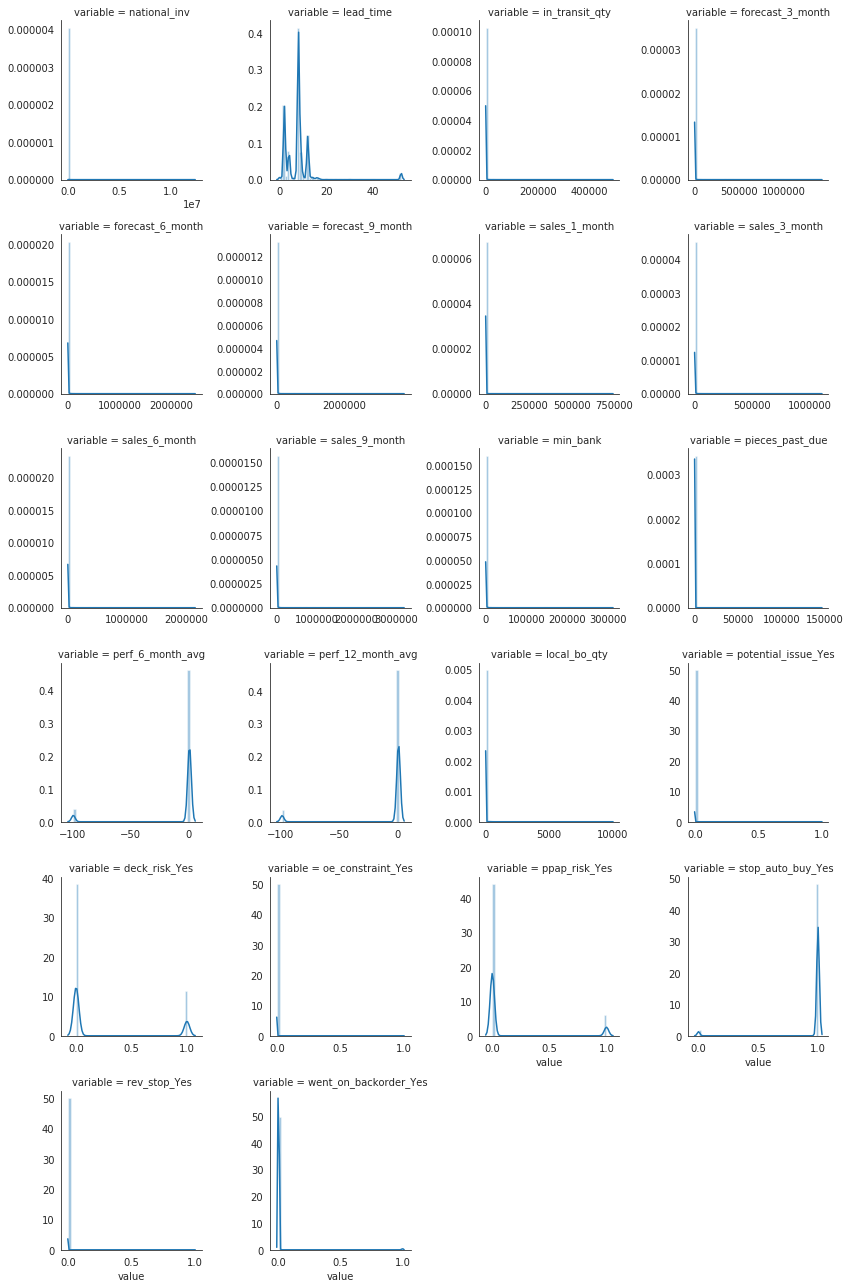

In [41]:
#plot numeric column distributions
helpers.ColumnTypes.histograms_numeric_columns(df)

* Most binary features are imbalanced
* We'll fix this later through upsampling the target variable

In [ ]:
$$$$$$$$NEXT Below @8.24pm 05/25/2020 applying power transformations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaa744f990>,
      dtype=object)

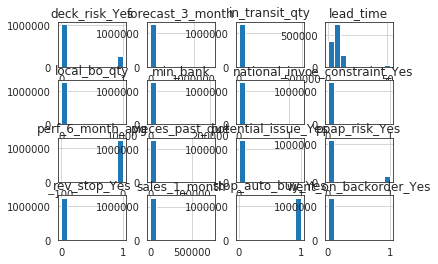

In [348]:
df.hist()

In [349]:
from sklearn.preprocessing import PowerTransformer

In [350]:
df.head()

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0  1486266         139.0        8.0             6.0               0.0   
1  1468661          -2.0       14.0             0.0               3.0   
2  2140959        7529.0        8.0             8.0            2500.0   
3  2197644         792.0        8.0             6.0               0.0   
4  1943809           3.0        2.0             0.0               0.0   

   sales_1_month  min_bank  pieces_past_due  perf_6_month_avg  local_bo_qty  \
0           18.0      24.0              0.0              0.98           0.0   
1           10.0      18.0              0.0              0.91           2.0   
2           71.0     117.0              0.0              1.00           0.0   
3            7.0      24.0              0.0              0.83           0.0   
4            0.0       0.0              0.0              0.38           0.0   

   potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0                    0              0                  0              0   
1                    0              0                  0              0   
2                    0              0                  0              0   
3                    0              0                  0              0   
4                    0              0                  0              0   

   stop_auto_buy_Yes  rev_stop_Yes  went_on_backorder_Yes  
0                  1             0                      0  
1                  1             0                      0  
2                  1             0                      0  
3                  1             0                      0  
4                  1             0                      1

In [363]:
# power transform the raw data
# use method = yeo-johnson or box-cox (box_cox only for strictly positive data)
power = PowerTransformer(method='yeo-johnson', standardize=False)

In [365]:
data_trans = power.fit_transform(df)

In [ ]:
df_trans = pd.DataFrame(data_trans)

In [361]:
df_trans.head()

0           1         2         3         4         5         6  \
0  8.205892   49.106975  2.298611  0.686658 -0.000000  1.334346  1.373475   
1  8.202377   -2.390764  2.863149 -0.000000  0.905188  1.233166  1.334438   
2  8.311847  923.745992  2.298611  0.702025  1.493753  1.473761  1.502162   
3  8.319306  177.594194  2.298611  0.686658 -0.000000  1.155891  1.373475   
4  8.284126    2.398425  1.123579 -0.000000 -0.000000 -0.000000 -0.000000   

     7         8         9   10   11   12   13            14   15        16  
0 -0.0  2.902454 -0.000000 -0.0 -0.0 -0.0 -0.0  6.543342e+15 -0.0 -0.000000  
1 -0.0  2.520485  0.028084 -0.0 -0.0 -0.0 -0.0  6.543342e+15 -0.0 -0.000000  
2 -0.0  3.018121 -0.000000 -0.0 -0.0 -0.0 -0.0  6.543342e+15 -0.0 -0.000000  
3 -0.0  2.125569 -0.000000 -0.0 -0.0 -0.0 -0.0  6.543342e+15 -0.0 -0.000000  
4 -0.0  0.602123 -0.000000 -0.0 -0.0 -0.0 -0.0  6.543342e+15 -0.0  0.004802

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaac0ef950>,
      dtype=object)

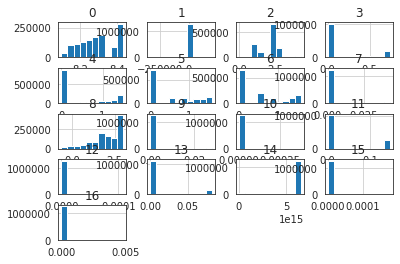

In [362]:
df_trans.hist()

In [ ]:
$$$$$$$$END ABOVE @8.24pm 05/25/2020 applying power transformations

# Summarize Numerical Features

In [42]:
df.describe().transpose()

count        mean           std      min   25%  \
national_inv           1350287.0  494.333274  29675.029863 -27256.0  4.00   
lead_time              1269437.0    7.875781      7.059364      0.0  4.00   
in_transit_qty         1350287.0   44.264424   1343.822171      0.0  0.00   
forecast_3_month       1350287.0  177.745891   4922.452640      0.0  0.00   
forecast_6_month       1350287.0  343.555729   9538.897335      0.0  0.00   
forecast_9_month       1350287.0  503.624860  13922.800495      0.0  0.00   
sales_1_month          1350287.0   55.455426   1850.217857      0.0  0.00   
sales_3_month          1350287.0  174.350146   5107.327355      0.0  0.00   
sales_6_month          1350287.0  340.323870   9349.398296      0.0  0.00   
sales_9_month          1350287.0  524.474661  14516.516511      0.0  0.00   
min_bank               1350287.0   52.962610   1263.417888      0.0  0.00   
pieces_past_due        1350287.0    1.976872    220.406508      0.0  0.00   
perf_6_month_avg       1350287.0   -6.885051     26.576854    -99.0  0.63   
perf_12_month_avg      1350287.0   -6.451346     25.865267    -99.0  0.66   
local_bo_qty           1350287.0    0.602991     31.624012      0.0  0.00   
potential_issue_Yes    1350288.0    0.000517      0.022730      0.0  0.00   
deck_risk_Yes          1350288.0    0.229594      0.420572      0.0  0.00   
oe_constraint_Yes      1350288.0    0.000147      0.012139      0.0  0.00   
ppap_risk_Yes          1350288.0    0.120826      0.325925      0.0  0.00   
stop_auto_buy_Yes      1350288.0    0.963694      0.187051      0.0  1.00   
rev_stop_Yes           1350288.0    0.000424      0.020595      0.0  0.00   
went_on_backorder_Yes  1350288.0    0.006699      0.081575      0.0  0.00   

                         50%    75%         max  
national_inv           15.00  80.00  12334404.0  
lead_time               8.00   9.00        52.0  
in_transit_qty          0.00   0.00    489408.0  
forecast_3_month        0.00   4.00   1427612.0  
forecast_6_month        0.00  12.00   2461360.0  
forecast_9_month        0.00  20.00   3777304.0  
sales_1_month           0.00   4.00    741762.0  
sales_3_month           1.00  15.00   1105478.0  
sales_6_month           2.00  31.00   2146625.0  
sales_9_month           4.00  47.00   3205172.0  
min_bank                0.00   3.00    313319.0  
pieces_past_due         0.00   0.00    146496.0  
perf_6_month_avg        0.82   0.97         1.0  
perf_12_month_avg       0.81   0.95         1.0  
local_bo_qty            0.00   0.00     10045.0  
potential_issue_Yes     0.00   0.00         1.0  
deck_risk_Yes           0.00   0.00         1.0  
oe_constraint_Yes       0.00   0.00         1.0  
ppap_risk_Yes           0.00   0.00         1.0  
stop_auto_buy_Yes       1.00   1.00         1.0  
rev_stop_Yes            0.00   0.00         1.0  
went_on_backorder_Yes   0.00   0.00         1.0

* There are possible rows missing values in our dataset
* We'll investigate further later

# Summarize Categorical Features

In [43]:
df.describe(include=['object'])

sku
count   1350288
unique  1350288
top     2097151
freq          1

# Duplicates

In [8]:
#Are there any duplicate columns?
helpers.check_dups(df)

No duplicates found


# Missing Values

In [6]:
#Are there any missing values
helpers.check_missing(df)


***************** Total and Percentage of Missing Values Found *****************

                   Total       Percent
lead_time          80851  5.987686e-02
min_bank               1  7.405827e-07
sales_1_month          1  7.405827e-07
national_inv           1  7.405827e-07
in_transit_qty         1  7.405827e-07
forecast_3_month       1  7.405827e-07
forecast_6_month       1  7.405827e-07
local_bo_qty           1  7.405827e-07
perf_12_month_avg      1  7.405827e-07
perf_6_month_avg       1  7.405827e-07
pieces_past_due        1  7.405827e-07
forecast_9_month       1  7.405827e-07
sales_9_month          1  7.405827e-07
sales_6_month          1  7.405827e-07
sales_3_month          1  7.405827e-07


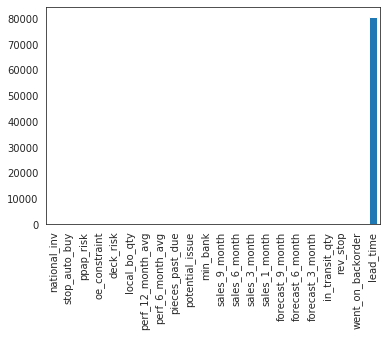

In [10]:
#Vizualize the proportion of missing values by feature
helpers.plot_missing(df)

In [11]:
#Get columns with over specific threshold percent
helpers.view_many_missing(df, 0.03)


******************* Features with over 0.03 percent missing ********************



['lead_time']

Before we decide on how we'll handle these columns with missing data, we need to:
    1. Identify possible reason for missingness
    2. Identify any obvious missingness patterns
    3. Then decide on how we'll handle these missing values on each specific columns

### 1. Possible Reasons for Missingness

* 'amount_purchase'
    - From numerical column summaries above we see that the minimum value held on this column is 100.00
    - Since this column holds the amount a customer spent besides on electronic, a missing on this column seem to appears to mean either no information or the customer spent only on electronics. 
    - Therefore, we can either decode these as missing or simply replace missing with 0 to signal no information or amount spent besides electronics.
        * note: We could also create an indicator variable to denote the customer only spent on electronics
    - For this project it seems practical to decode these missing values with 0
        * Note: We can evaluate later how the model performs when either form of decoding is used
    
### 2. Obvious Missingness Patterns

- For all the other columns are missing the same amount data
- This indicates that it could be the same customers missing all that information.
- Let's investigate further

In [6]:
#Are the same rows missing the same information?
#Setting n =22 as we have 21 columns with at least 1 missing value
helpers.view_missing_by_row(df, 22)


**************** 1350288 rows with missing data found in dataset****************

 1 Rows with 22 records missing found


sku  national_inv  lead_time  in_transit_qty  \
295902  (1687860 rows)           NaN        NaN             NaN   

        forecast_3_month  forecast_6_month  forecast_9_month  sales_1_month  \
295902               NaN               NaN               NaN            NaN   

        sales_3_month  sales_6_month  sales_9_month  min_bank potential_issue  \
295902            NaN            NaN            NaN       NaN             NaN   

        pieces_past_due  perf_6_month_avg  perf_12_month_avg  local_bo_qty  \
295902              NaN               NaN                NaN           NaN   

       deck_risk oe_constraint ppap_risk stop_auto_buy rev_stop  \
295902       NaN           NaN       NaN           NaN      NaN   

       went_on_backorder  missing  
295902               NaN       22

We can clearly see that 1 row is identified with 22 missing values above are all from the same observations.

So, we'll remove all items with missing lead_time

We'll handle these missing values for EDA purposes manually now, but build a transformer that will handle these two steps automatically during data modeling.

## Handling Missing Values

In [10]:
#For 'amount_purchase", replace Nans with 0
#df['amount_purchase'].fillna(0, inplace=True)

In [7]:
# Delete all remaining rows with missing values
df.dropna(axis = 0, how = 'any', inplace = True)

In [8]:
#Confirm no missing
helpers.check_missing(df)

No Missing Values found.


In [9]:
df.shape

(1269437, 23)

## Non Unique  Values

In [17]:
#Are there any columns with non unique values?
helpers.check_non_unique(df)

No columns with non unique values found


## Sparse Classes

In [ ]:
#Are there any categorical features with cardinality?
helpers.CheckCardinality.check_sparse_classes(df, plots =False)

However, from the histogram plots above, we know that we do have sparse (unbalanced) classes

This method did not identify them because those columns are encoded as numeric datatypes

We will fix these unbalanced classes as needed later in our project.

# Outliers

## 1. Univariate Outlier Analysis

Here we'll check for outliers on selected numerical variables 

In [9]:
!conda uninstall -c anaconda statsmodels -y

Solving environment: done

## Package Plan ##

  environment location: /home/sl202194/miniconda3

  removed specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    astroid-2.4.1              |           py37_0         297 KB  anaconda
    joblib-0.15.1              |             py_0         207 KB  anaconda
    more-itertools-8.3.0       |             py_0          41 KB  anaconda
    pylint-2.5.2               |           py37_0         465 KB  anaconda
    setuptools-46.4.0          |           py37_0         645 KB  anaconda
    sqlalchemy-1.3.17          |   py37h7b6447c_0         1.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         3.4 MB

The following packages will be REMOVED:

  patsy-0.5.1-py_0
  statsmodels-0.11.1-py37h8f50634_1

The following packages will be UPDATED:

  

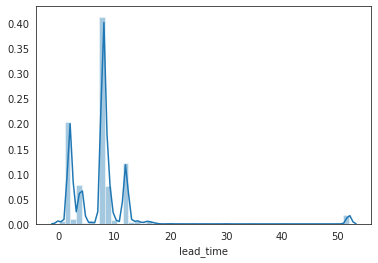

In [9]:
#Outliers on 'lead_time'
sns.distplot(df['lead_time'])

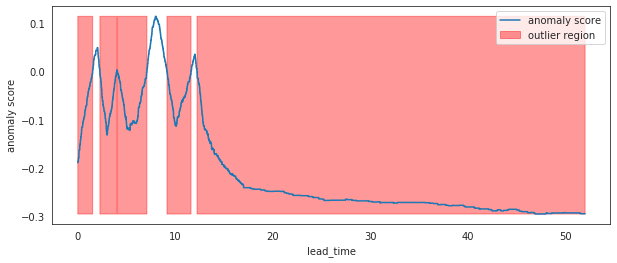

In [11]:
#check outlier bounderies
helpers.visualize_outlier_regions('lead_time', df)

In [12]:
#let's vizualize some outliers
df.loc[df['lead_time'] > 20]

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
7        2097666        4930.0       52.0             0.0               0.0   
83       2143267           2.0       52.0             0.0               0.0   
100      3138951           6.0       30.0             0.0               1.0   
274      1534141       11307.0       52.0             0.0               0.0   
275      2134789         248.0       24.0             3.0              77.0   
...          ...           ...        ...             ...               ...   
1349982  1497972           4.0       52.0             0.0               0.0   
1350001  1296834          26.0       52.0             0.0               0.0   
1350052  1462631         419.0       52.0             0.0               0.0   
1350100  1566490       22875.0       52.0             0.0               0.0   
1350270  2161038         198.0       52.0             0.0               0.0   

         forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
7                     0.0               0.0            0.0            0.0   
83                    0.0               0.0            0.0            0.0   
100                   1.0               5.0            0.0            2.0   
274                   0.0               0.0            0.0            2.0   
275                 227.0             397.0           85.0          165.0   
...                   ...               ...            ...            ...   
1349982               0.0               0.0            0.0            0.0   
1350001               0.0               0.0            0.0            0.0   
1350052               0.0               0.0            8.0           23.0   
1350100               0.0               0.0            0.0            0.0   
1350270               0.0               0.0            1.0            3.0   

         sales_6_month  sales_9_month  min_bank potential_issue  \
7                  0.0            0.0       0.0              No   
83                 0.0            0.0       1.0              No   
100                5.0           14.0       0.0              No   
274                2.0           12.0       2.0              No   
275              396.0          469.0      16.0              No   
...                ...            ...       ...             ...   
1349982            0.0            0.0       0.0              No   
1350001            0.0            0.0       2.0              No   
1350052           46.0           72.0      18.0              No   
1350100           10.0           11.0       0.0              No   
1350270            5.0            5.0       0.0              No   

         pieces_past_due  perf_6_month_avg  perf_12_month_avg  local_bo_qty  \
7                    0.0              0.94               0.87           0.0   
83                   0.0              0.90               0.93           0.0   
100                  0.0              0.76               0.81           0.0   
274                  0.0            -99.00             -99.00           0.0   
275                  0.0              0.88               0.89           0.0   
...                  ...               ...                ...           ...   
1349982              0.0              0.71               0.75           0.0   
1350001              0.0              1.00               0.96           0.0   
1350052              0.0              0.83               0.91           0.0   
1350100              0.0              0.95               0.86           0.0   
1350270              0.0            -99.00             -99.00           0.0   

        deck_risk oe_constraint ppap_risk stop_auto_buy rev_stop  \
7             Yes            No        No            No       No   
83            Yes            No        No            No       No   
100            No            No       Yes           Yes       No   
274           Yes            No        No            No       No   
275            No            No        No    

Nothing seems out of ordinary

Seem's lead_time is recorded in number of weeks

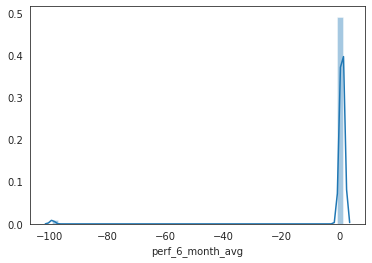

In [13]:
#Outliers on 'perf_6_month_avg'
sns.distplot(df['perf_6_month_avg'])

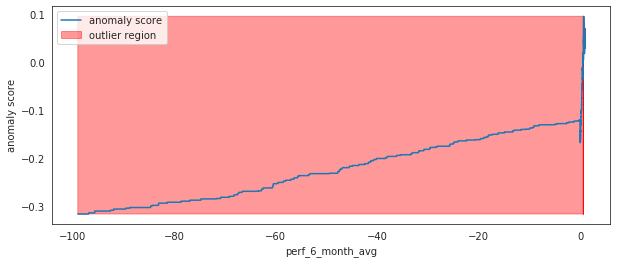

In [14]:
#check outlier bounderies
helpers.visualize_outlier_regions('perf_6_month_avg', df)

In [18]:
#let's vizualize some outliers
df.loc[df['perf_6_month_avg'] < -80]

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
87       1323921           0.0        8.0             0.0               0.0   
103      2230218           0.0        8.0             0.0               0.0   
144      1663751         810.0        8.0             0.0               0.0   
165      1484526          45.0        8.0             0.0               0.0   
274      1534141       11307.0       52.0             0.0               0.0   
...          ...           ...        ...             ...               ...   
1350110  3009117        4015.0        2.0             0.0               0.0   
1350183  1346471         278.0        3.0             0.0               0.0   
1350216  1716077       15372.0        8.0         16380.0            7560.0   
1350264  2131756           0.0        2.0             0.0               0.0   
1350270  2161038         198.0       52.0             0.0               0.0   

         forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
87                    0.0               0.0            0.0            0.0   
103                   0.0               0.0            0.0            0.0   
144                   0.0               0.0            0.0            0.0   
165                   0.0               0.0            1.0            1.0   
274                   0.0               0.0            0.0            2.0   
...                   ...               ...            ...            ...   
1350110               0.0               0.0            2.0            7.0   
1350183               0.0              19.0            0.0            0.0   
1350216            7560.0            7560.0          349.0          378.0   
1350264               0.0               0.0            0.0            0.0   
1350270               0.0               0.0            1.0            3.0   

         sales_6_month  sales_9_month  min_bank potential_issue  \
87                 0.0            0.0       0.0              No   
103                0.0            0.0       0.0              No   
144                0.0            0.0       1.0              No   
165                1.0            1.0       0.0              No   
274                2.0           12.0       2.0              No   
...                ...            ...       ...             ...   
1350110           18.0           19.0       2.0              No   
1350183            0.0            0.0       0.0              No   
1350216          378.0          378.0   18803.0              No   
1350264            0.0            0.0       1.0              No   
1350270            5.0            5.0       0.0              No   

         pieces_past_due  perf_6_month_avg  perf_12_month_avg  local_bo_qty  \
87                   0.0             -99.0             -99.00           0.0   
103                  0.0             -99.0             -99.00           0.0   
144                  0.0             -99.0             -99.00           0.0   
165                  0.0             -99.0               0.00           0.0   
274                  0.0             -99.0             -99.00           0.0   
...                  ...               ...                ...           ...   
1350110              0.0             -99.0               0.28           0.0   
1350183              0.0             -99.0             -99.00           0.0   
1350216              0.0             -99.0               0.44           0.0   
1350264              0.0             -99.0             -99.00           0.0   
1350270              0.0             -99.0             -99.00           0.0   

        deck_risk oe_constraint ppap_risk stop_auto_buy rev_stop  \
87             No            No        No           Yes       No   
103            No            No       Yes           Yes       No   
144            No            No        No           Yes       No   
165            No            No        No           Yes       No   
274           Yes            No        No    

In [ ]:
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$START DELETE UN Needed sections BELOW  @6:25p 05/23/2020

In [14]:
#Handling 'age' outliers
df['age'] = np.where((df.age >= 100),-1,df.age)

In [ ]:
$$$$$$start below @2:26pm 05/19/2020
    DROP MISSING AGE INSTEAD

In [15]:
#Dropping missing age instead
df.drop( df[ df['age'] == -1 ].index , inplace=True)

In [ ]:
$$$$$$END ABOVE @2:26pm 05/19/2020
    DROP MISSING AGE INSTEAD

In [16]:
#Sanity chech changes
df.loc[df['age'] > 100]

Empty DataFrame
Columns: [date, client_id, previously_shoped, member, promotion, shop_competitor, prize_won, require_financing, got_a_TV, did_a_purchase, promotions_used, LT_clients, prize_amount, amount_financing, amount_purchase, nb_electronics, female, email, live_with_parents, work, family, state, education, age, monthly_spent_electronics, year, month]
Index: []

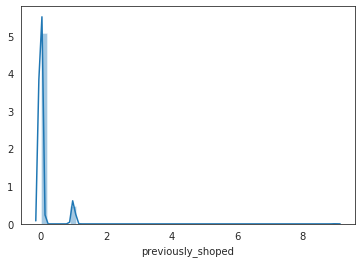

In [90]:
#Outliers on 'previously_shoped'
sns.distplot(df['previously_shoped'])

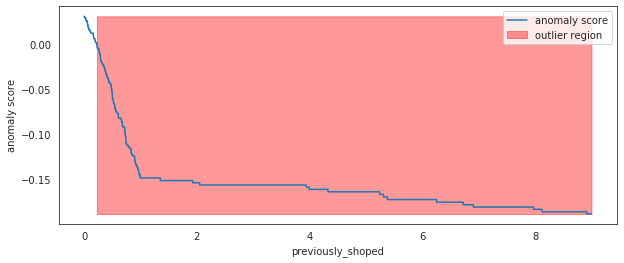

In [91]:
#check outlier bounderies
helpers.visualize_outlier_regions('previously_shoped', df)

In [92]:
#let's vizualize some outliers
df.loc[df['previously_shoped'] > 2]

date  client_id  previously_shoped  member  promotion  \
354   2018-09-30       5879                9.0     1.0        0.0   
1237  2017-11-30       3102                9.0     1.0        0.0   
7645  2018-05-31      12963                9.0     0.0        0.0   
9497  2018-02-28       9292                9.0     0.0        1.0   
10080 2018-05-31       1238                9.0     1.0        1.0   
11101 2018-01-31      15381                9.0     1.0        1.0   
14291 2018-01-31       5503                9.0     0.0        0.0   
14731 2017-12-31      12575                9.0     0.0        0.0   
15640 2018-02-28      10360                9.0     0.0        0.0   

       shop_competitor  prize_won  require_financing  got_a_TV  \
354                0.0        0.0                0.0       0.0   
1237               0.0        1.0                0.0       0.0   
7645               0.0        1.0                0.0       0.0   
9497               0.0        0.0                0.0       0.0   
10080              0.0        1.0                0.0       0.0   
11101              1.0        1.0                0.0       0.0   
14291              0.0        0.0                0.0       0.0   
14731              1.0        1.0                1.0       0.0   
15640              1.0        0.0                0.0       0.0   

       did_a_purchase  promotions_used  LT_clients  prize_amount  \
354               1.0              1.0        10.0      0.000000   
1237              1.0              2.0         6.0      0.000000   
7645              1.0              2.0         6.0      0.000000   
9497              1.0              1.0        10.0    150.416667   
10080             1.0              2.0         3.0    145.416667   
11101             1.0              2.0        11.0    118.055556   
14291             1.0              4.0        13.0      0.000000   
14731             1.0              3.0         0.0      0.000000   
15640             1.0              1.0         8.0      0.000000   

       amount_financing  amount_purchase  nb_electronics  female  email  \
354             0.00000           1490.0             1.0       1      1   
1237            0.00000           2720.0             0.0       0      0   
7645            0.00000            560.0             0.0       0      1   
9497            0.00000           1420.0             1.0       1      0   
10080           0.00000           1630.0             0.0       0      1   
11101           0.00000           1230.0             0.0       1      1   
14291           0.00000           3180.0             0.0       0      1   
14731       16833.33333            810.0             0.0       0      1   
15640           0.00000           2080.0             1.0       0      0   

       live_with_parents          work       family       state  education  \
354                    0  white_collar  4+_children    Illinois          2   
1237                   0        no_job      1_child    Illinois          1   
7645                   0       manager      1_child  California          4   
9497                   0       manager      0_child       Maine          3   
10080                  0  professional   2_children  California          5   
11101                  0  professional      0_child       Maine          5   
14291                  0  professional      0_child     Vermont          2   
14731                  1       manager   2_children    Illinois          3   
15640                  0  professional      0_child  California          3   

       age  monthly_spent_electronics    year  month  
354     43                4000.000000  2018.0    9.0  
1237    62                4916.666667  2017.0   11.0  
7645    63                5500.000000  2018.0    5.0  
9497    67                4500.000000  2018.0    2.0  
10080   30                3250.000000  2018.0    5.0  
11101   66                3666.666667  2018.0    1.0  
14291   60                1916.666667  2018.0    1.0  
14731  

In [17]:
df.previously_shoped.unique()

array([0., 1., 9.])

In [ ]:
$$$$$$start below @2:31pm 05/19/2020
    DROP MISSING previously_shoped INSTEAD

In [18]:
#Dropping missing previously_shoped instead
df.drop( df[ df['previously_shoped'] == 9 ].index , inplace=True)

In [ ]:
$$$$$$END ABOVE @2:31pm 05/19/2020
    DROP MISSING previously_shoped INSTEAD

In [94]:
#Handling 'previously_shoped' outliers
df['previously_shoped'] = np.where((df.previously_shoped == 9),-1,df.previously_shoped)

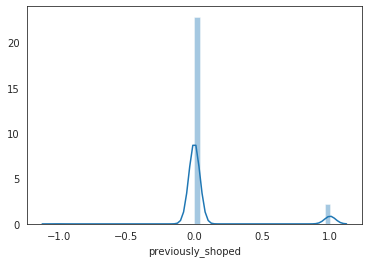

In [95]:
#Sanity check Outliers on 'previously_shoped'
sns.distplot(df['previously_shoped'])

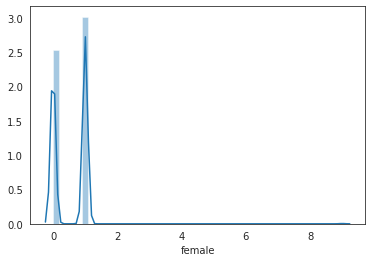

In [96]:
#Outliers on 'female'
sns.distplot(df['female'])

In [20]:
df.female.unique()

array([1, 0, 9])

In [ ]:
$$$$$$start below @2:33pm 05/19/2020
    DROP MISSING female INSTEAD

In [21]:
#Dropping missing female instead
df.drop( df[ df['female'] == 9 ].index , inplace=True)

In [22]:
#Sanity check dropped
df.female.unique()

array([1, 0])

In [ ]:
$$$$$$END ABOVE @2:33pm 05/19/2020
    DROP MISSING female INSTEAD

In [98]:
#Handling 'female' outliers
df['female'] = np.where((df.female == 9),-1,df.previously_shoped)

In [99]:
#sanity check
df.female.unique()

array([ 0.,  1., -1.])

In [ ]:
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$END DELETE UN Needed sections above @6:25p 05/23/2020

## 2. Multivariate Outlier Analysis

Here we'll run some selected algorithms that will help us identify multivariate outliers.

The helper function returns outlier row index labels for outliers commonly identified by all algorithms.

In [19]:
#Make copy of dataframe so changes don't impact our original dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics).copy()

In [20]:
numeric_df.head()

national_inv  lead_time  in_transit_qty  forecast_3_month  \
0          12.0        9.0             0.0               1.0   
1           2.0        8.0             2.0              12.0   
2           7.0       12.0             0.0               0.0   
3           0.0        8.0             0.0               0.0   
4           7.0        8.0             0.0               0.0   

   forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
0               8.0               9.0            3.0            4.0   
1              20.0              26.0            1.0            7.0   
2               0.0               0.0            0.0            0.0   
3               0.0               0.0            0.0            0.0   
4               0.0               0.0            1.0            3.0   

   sales_6_month  sales_9_month  min_bank  pieces_past_due  perf_6_month_avg  \
0            8.0           13.0       8.0              0.0              0.91   
1           14.0           22.0       2.0              0.0              0.50   
2            0.0            0.0       0.0              0.0              0.62   
3            0.0            0.0       0.0              0.0              0.78   
4            6.0            8.0       0.0              0.0              0.90   

   perf_12_month_avg  local_bo_qty  
0               0.74           0.0  
1               0.46           0.0  
2               0.73           0.0  
3               0.74           0.0  
4               0.95           0.0

In [21]:
#Get list of column names
cols = []
for name in numeric_df.columns:
    cols.append(name)

In [22]:
cols

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty']

In [64]:
#Remove 'date'
#del cols[0]

In [27]:
#Run multivariate outliers analysis
outlier_indices = helpers.Outliers.get_outliers(numeric_df, cols, outliers_fraction = 0.01,
                                                row_id = 'sku', n =3)

OUTLIERS: 161 INLIERS: 15875 found with CBLOF
OUTLIERS: 161 INLIERS: 15875 found with HBOS
OUTLIERS: 161 INLIERS: 15875 found with IForest
OUTLIERS: 124 INLIERS: 15912 found with KNN
 
76 outliers commonly found by all algorithms

The row index labels are:
 [595, 2566, 7934, 9283, 12151, 289, 640, 744, 757, 1589, 1601, 1757, 1830, 2105, 2461, 2545, 2627, 2703, 2752, 3084, 3404, 3801, 4075, 4245, 4275, 4300, 5012, 5249, 5457, 5701, 5717, 6118, 6174, 6470, 6535, 7233, 7681, 7945, 7957, 8103, 8255, 8472, 9202, 9432, 9435, 9526, 9603, 9878, 9903, 9948, 10043, 10776, 10884, 10991, 11264, 11275, 11646, 12206, 12293, 13313, 14096, 14114, 14246, 14384, 14413, 14682, 14757, 14876, 14885, 15199, 15214, 15491, 15633, 15985, 16044, 16088]


Let's have a look at some identified outliers to help determine our next step.

In [28]:
df.iloc[595]

date                         2018-02-28 00:00:00
client_id                                  19820
previously_shoped                              0
member                                         0
promotion                                      0
shop_competitor                                0
prize_won                                      0
require_financing                              1
got_a_TV                                       0
did_a_purchase                                 1
promotions_used                                2
LT_clients                                     5
prize_amount                                   0
amount_financing                         24083.3
amount_purchase                              100
nb_electronics                                 0
female                                         0
email                                          1
live_with_parents                              1
work                                      no_job
family              

In [29]:
df.iloc[9878]

date                         2017-10-31 00:00:00
client_id                                   6727
previously_shoped                              0
member                                         0
promotion                                      1
shop_competitor                                0
prize_won                                      0
require_financing                              0
got_a_TV                                       0
did_a_purchase                                 1
promotions_used                                1
LT_clients                                     0
prize_amount                             128.194
amount_financing                               0
amount_purchase                             1630
nb_electronics                                 1
female                                         0
email                                          0
live_with_parents                              0
work                                     retired
family              

In [33]:
df.iloc[3404]

date                         2018-08-31 00:00:00
client_id                                    906
previously_shoped                              0
member                                         1
promotion                                      0
shop_competitor                                1
prize_won                                      0
require_financing                              0
got_a_TV                                       0
did_a_purchase                                 1
promotions_used                                1
LT_clients                                     7
prize_amount                                   0
amount_financing                               0
amount_purchase                             3580
nb_electronics                                 1
female                                         1
email                                          1
live_with_parents                              0
work                                 blue_collar
family              

In [34]:
#How is 'monthly_spent_electronics' distributed?
df.monthly_spent_electronics.describe()

count    16036.000000
mean      5023.868172
std       2589.965408
min        833.333333
25%       3833.333333
50%       5000.000000
75%       6083.333333
max      94333.333330
Name: monthly_spent_electronics, dtype: float64

In [35]:
df.amount_financing.describe()

count     16036.000000
mean       5336.711150
std       10995.079571
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      212458.333300
Name: amount_financing, dtype: float64

Although we see no apprent reason for outlierness of these observations besides high finance amounts for most,

we'll remove them from our analysis as four different algorithms flagged these 52 observations as outliers. 

## 3. Handling Outliers

In [108]:
#Drop rows by returned outlier index labels 
df = df.drop(df.index[(outlier_indices)])

In [109]:
df.shape

(16337, 27)

In [49]:
df.shape

(1269437, 23)

# Inspecting the Target Variable

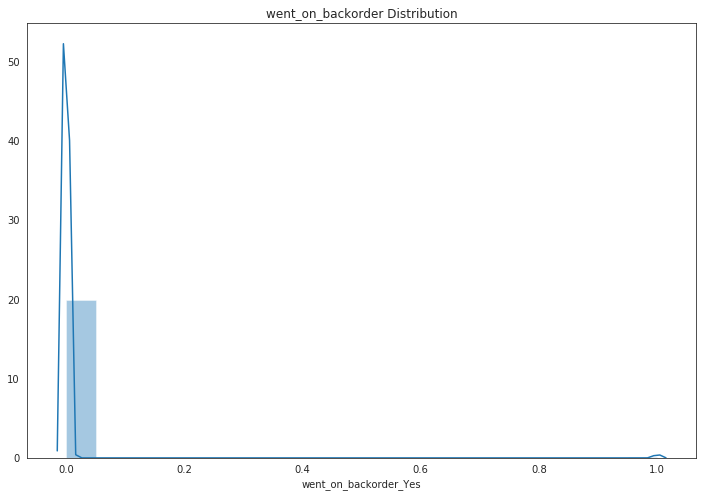

In [10]:
plt.figure(figsize=(12, 8))

sns.distplot(df['went_on_backorder_Yes'], bins=20)

plt.title('went_on_backorder Distribution')

plt.show()

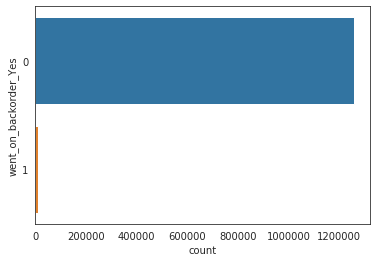

In [11]:
# Bar plot for 'went_on_backorder'
sns.countplot(y='went_on_backorder_Yes', data=df)
plt.show()

* We have an inbalanced data set
* We'll upsample cases of went_on_backorder to match those that did not during data preprocessing.

## Handling Unbalanced Classes

In [12]:
#Get target column value caounts
df['went_on_backorder_Yes'].value_counts()

0    1260643
1       8794
Name: went_on_backorder_Yes, dtype: int64

In [13]:
#Seperate minority and majority classes
df_majority = df[df.went_on_backorder_Yes == 0]
df_minority = df[df.went_on_backorder_Yes == 1]

In [14]:
#Upsample minority class
df_minority_upsampled = resample(df_minority, replace = True,
                                n_samples = 1260643, random_state=777)

In [15]:
#Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled ])

In [16]:
# Display new class counts
df_upsampled['went_on_backorder_Yes'].value_counts()

1    1260643
0    1260643
Name: went_on_backorder_Yes, dtype: int64

In [17]:
#Update main dataframe
df = df_upsampled

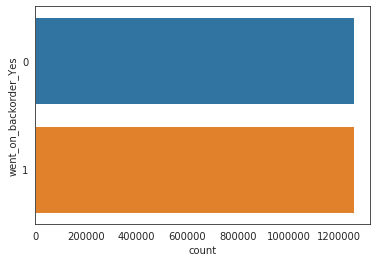

In [18]:
#Sanity check
sns.countplot(y='went_on_backorder_Yes', data=df)
plt.show()

In [19]:
df.head()

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0  1486266         139.0        8.0             6.0               0.0   
1  1468661          -2.0       14.0             0.0               3.0   
2  2140959        7529.0        8.0             8.0            2500.0   
3  2197644         792.0        8.0             6.0               0.0   
5  1483097          13.0       12.0             0.0               0.0   

   forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
0             350.0             350.0           18.0           52.0   
1              24.0              32.0           10.0           31.0   
2            2500.0            2500.0           71.0          114.0   
3               0.0               0.0            7.0           41.0   
5               0.0               0.0            0.0            0.0   

   sales_6_month  sales_9_month  min_bank  pieces_past_due  perf_6_month_avg  \
0          115.0          185.0      24.0              0.0              0.98   
1           33.0           33.0      18.0              0.0              0.91   
2         1563.0         2419.0     117.0              0.0              1.00   
3           99.0          192.0      24.0              0.0              0.83   
5            0.0            0.0       1.0              0.0              0.58   

   perf_12_month_avg  local_bo_qty  potential_issue_Yes  deck_risk_Yes  \
0               0.99           0.0                    0              0   
1               0.88           2.0                    0              0   
2               1.00           0.0                    0              0   
3               0.91           0.0                    0              0   
5               0.58           0.0                    0              1   

   oe_constraint_Yes  ppap_risk_Yes  stop_auto_buy_Yes  rev_stop_Yes  \
0                  0              0                  1             0   
1                  0              0                  1             0   
2                  0              0                  1             0   
3                  0              0                  1             0   
5                  0              0                  1             0   

   went_on_backorder_Yes  
0                      0  
1                      0  
2                      0  
3                      0  
5                      0

In [36]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           9041        3040        4768         240        1232        5506
Swap:          2047        1816         231


In [ ]:
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$@4:44 05/24/2020 START BELOW HANDLING UNBALNCED CLASSES WITH SMOTE

In [10]:
df.shape

(1269437, 23)

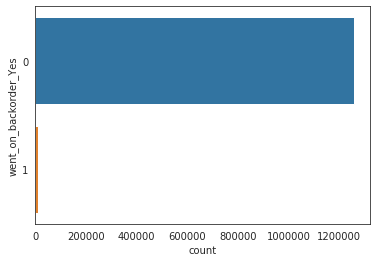

In [11]:
# Bar plot for 'went_on_backorder'
sns.countplot(y='went_on_backorder_Yes', data=df)
plt.show()

# Using SMOTE

In [14]:
!conda install -c conda-forge imbalanced-learn -y

Solving environment: done

## Package Plan ##

  environment location: /home/sl202194/miniconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.6.2     |             py_0          95 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          95 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.6.2-py_0



imbalanced-learn-0.6 | 95 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [122]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [123]:
data = df

In [124]:
data.head()

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0  1486266         139.0        8.0             6.0               0.0   
1  1468661          -2.0       14.0             0.0               3.0   
2  2140959        7529.0        8.0             8.0            2500.0   
3  2197644         792.0        8.0             6.0               0.0   
4  1943809           3.0        2.0             0.0               0.0   

   forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
0             350.0             350.0           18.0           52.0   
1              24.0              32.0           10.0           31.0   
2            2500.0            2500.0           71.0          114.0   
3               0.0               0.0            7.0           41.0   
4               0.0               0.0            0.0            2.0   

   sales_6_month  sales_9_month  min_bank  pieces_past_due  perf_6_month_avg  \
0          115.0          185.0      24.0              0.0              0.98   
1           33.0           33.0      18.0              0.0              0.91   
2         1563.0         2419.0     117.0              0.0              1.00   
3           99.0          192.0      24.0              0.0              0.83   
4            6.0            6.0       0.0              0.0              0.38   

   perf_12_month_avg  local_bo_qty  potential_issue_Yes  deck_risk_Yes  \
0               0.99           0.0                    0              0   
1               0.88           2.0                    0              0   
2               1.00           0.0                    0              0   
3               0.91           0.0                    0              0   
4               0.40           0.0                    0              0   

   oe_constraint_Yes  ppap_risk_Yes  stop_auto_buy_Yes  rev_stop_Yes  \
0                  0              0                  1             0   
1                  0              0                  1             0   
2                  0              0                  1             0   
3                  0              0                  1             0   
4                  0              0                  1             0   

   went_on_backorder_Yes  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1

In [125]:
data.shape

(1269437, 23)

In [126]:
#sample data to manage training time
data = data.sample(frac=0.03, random_state=7)
print(data.shape)

(38083, 23)


In [127]:
#split data
X = np.array(data.loc[:, data.columns != 'went_on_backorder_Yes'])
y = np.array(data.loc[:, data.columns == 'went_on_backorder_Yes']).reshape(-1, 1)

In [128]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [129]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                    random_state = 2, shuffle = True, stratify = y)

In [130]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [131]:

X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

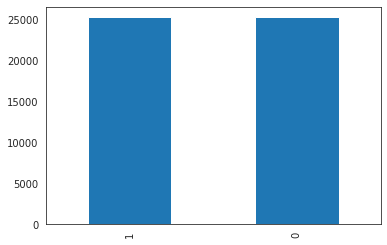

In [132]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

In [133]:
len(y_train_new)

50670

In [134]:
len(X_train_new)

50670

In [135]:
# import logistic regression model and accuracy_score metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'lbfgs')

In [136]:
# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [137]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.6623051115058219
Accuracy score for Testing Dataset =  0.6000954805856142


In [138]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], 
                  colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          15178  10157  25335
1           6954  18381  25335
All        22132  28538  50670


An unbalnced data set upsampled with SMOTE seems to perform better.

Next @5:45pm 05/24/2020, try to perform this test on the validation set and see if I still get better recall

In [ ]:
$$$$$$$$$$$$$$$NEXT BELOW @3:33pm 05/25/2020 try train withanomally detection methods

In [321]:
#get data
df.head()

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0  1486266         139.0        8.0             6.0               0.0   
1  1468661          -2.0       14.0             0.0               3.0   
2  2140959        7529.0        8.0             8.0            2500.0   
3  2197644         792.0        8.0             6.0               0.0   
4  1943809           3.0        2.0             0.0               0.0   

   sales_1_month  min_bank  pieces_past_due  perf_6_month_avg  local_bo_qty  \
0           18.0      24.0              0.0              0.98           0.0   
1           10.0      18.0              0.0              0.91           2.0   
2           71.0     117.0              0.0              1.00           0.0   
3            7.0      24.0              0.0              0.83           0.0   
4            0.0       0.0              0.0              0.38           0.0   

   potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0                    0              0                  0              0   
1                    0              0                  0              0   
2                    0              0                  0              0   
3                    0              0                  0              0   
4                    0              0                  0              0   

   stop_auto_buy_Yes  rev_stop_Yes  went_on_backorder_Yes  
0                  1             0                      0  
1                  1             0                      0  
2                  1             0                      0  
3                  1             0                      0  
4                  1             0                      1

In [415]:
df.shape

(1269437, 17)

In [416]:
#Get columns
columns = df.columns.tolist()

In [417]:
#Filter columns to remove data we do not want
columns = [c for c in columns if c not in ['went_on_backorder_Yes', 'sku']]

In [418]:
backorder = df['went_on_backorder_Yes']

In [419]:
backorder.shape

(1269437,)

In [420]:
#reset index
backorder = backorder.reset_index(drop=True)

In [421]:
#Standardize features
features = df[columns]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = columns)

In [422]:
scaled_features.head()

national_inv  lead_time  in_transit_qty  forecast_3_month  sales_1_month  \
0     -0.011388   0.017596       -0.030446         -0.037112      -0.021814   
1     -0.016008   0.867532       -0.035059         -0.036521      -0.026375   
2      0.230747   0.017596       -0.028909          0.455410       0.008402   
3      0.010007   0.017596       -0.030446         -0.037112      -0.028085   
4     -0.015844  -0.832339       -0.035059         -0.037112      -0.032076   

   min_bank  pieces_past_due  perf_6_month_avg  local_bo_qty  \
0 -0.026260        -0.009246          0.150422     -0.019581   
1 -0.031637        -0.009246          0.145153      0.045304   
2  0.057084        -0.009246          0.151927     -0.019581   
3 -0.026260        -0.009246          0.139131     -0.019581   
4 -0.047768        -0.009246          0.105257     -0.019581   

   potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0            -0.023405      -0.505066          -0.012521      -0.367299   
1            -0.023405      -0.505066          -0.012521      -0.367299   
2            -0.023405      -0.505066          -0.012521      -0.367299   
3            -0.023405      -0.505066          -0.012521      -0.367299   
4            -0.023405      -0.505066          -0.012521      -0.367299   

   stop_auto_buy_Yes  rev_stop_Yes  
0           0.159142     -0.016003  
1           0.159142     -0.016003  
2           0.159142     -0.016003  
3           0.159142     -0.016003  
4           0.159142     -0.016003

In [423]:
scaled_features.tail()

national_inv  lead_time  in_transit_qty  forecast_3_month  \
1269432      0.610661  -0.832339       -0.027371         -0.037112   
1269433     -0.011650  -0.832339       -0.000463         -0.027262   
1269434     -0.015680  -0.549027       -0.035059         -0.037112   
1269435     -0.015910   0.584220       -0.035059         -0.036718   
1269436     -0.013846   0.584220       -0.035059         -0.037112   

         sales_1_month  min_bank  pieces_past_due  perf_6_month_avg  \
1269432      -0.028085  0.002418        -0.009246          0.092460   
1269433      -0.017253 -0.011025        -0.009246          0.148916   
1269434      -0.032076 -0.047768        -0.009246          0.134614   
1269435      -0.032076 -0.047768        -0.009246          0.119559   
1269436      -0.032076 -0.047768        -0.009246          0.146658   

         local_bo_qty  potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  \
1269432     -0.019581            -0.023405      -0.505066          -0.012521   
1269433     -0.019581            -0.023405      -0.505066          -0.012521   
1269434     -0.019581            -0.023405      -0.505066          -0.012521   
1269435     -0.019581            -0.023405      -0.505066          -0.012521   
1269436     -0.019581            -0.023405      -0.505066          -0.012521   

         ppap_risk_Yes  stop_auto_buy_Yes  rev_stop_Yes  
1269432      -0.367299           0.159142     -0.016003  
1269433      -0.367299           0.159142     -0.016003  
1269434      -0.367299           0.159142     -0.016003  
1269435      -0.367299           0.159142     -0.016003  
1269436      -0.367299           0.159142     -0.016003

In [424]:
scaled_features.shape

(1269437, 15)

In [425]:
backorder.shape

(1269437,)

In [426]:
backorder

0          0
1          0
2          0
3          0
4          1
          ..
1269432    0
1269433    0
1269434    0
1269435    0
1269436    0
Name: went_on_backorder_Yes, Length: 1269437, dtype: int64

In [427]:
scaled_features

national_inv  lead_time  in_transit_qty  forecast_3_month  \
0           -0.011388   0.017596       -0.030446         -0.037112   
1           -0.016008   0.867532       -0.035059         -0.036521   
2            0.230747   0.017596       -0.028909          0.455410   
3            0.010007   0.017596       -0.030446         -0.037112   
4           -0.015844  -0.832339       -0.035059         -0.037112   
...               ...        ...             ...               ...   
1269432      0.610661  -0.832339       -0.027371         -0.037112   
1269433     -0.011650  -0.832339       -0.000463         -0.027262   
1269434     -0.015680  -0.549027       -0.035059         -0.037112   
1269435     -0.015910   0.584220       -0.035059         -0.036718   
1269436     -0.013846   0.584220       -0.035059         -0.037112   

         sales_1_month  min_bank  pieces_past_due  perf_6_month_avg  \
0            -0.021814 -0.026260        -0.009246          0.150422   
1            -0.026375 -0.031637        -0.009246          0.145153   
2             0.008402  0.057084        -0.009246          0.151927   
3            -0.028085 -0.026260        -0.009246          0.139131   
4            -0.032076 -0.047768        -0.009246          0.105257   
...                ...       ...              ...               ...   
1269432      -0.028085  0.002418        -0.009246          0.092460   
1269433      -0.017253 -0.011025        -0.009246          0.148916   
1269434      -0.032076 -0.047768        -0.009246          0.134614   
1269435      -0.032076 -0.047768        -0.009246          0.119559   
1269436      -0.032076 -0.047768        -0.009246          0.146658   

         local_bo_qty  potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  \
0           -0.019581            -0.023405      -0.505066          -0.012521   
1            0.045304            -0.023405      -0.505066          -0.012521   
2           -0.019581            -0.023405      -0.505066          -0.012521   
3           -0.019581            -0.023405      -0.505066          -0.012521   
4           -0.019581            -0.023405      -0.505066          -0.012521   
...               ...                  ...            ...                ...   
1269432     -0.019581            -0.023405      -0.505066          -0.012521   
1269433     -0.019581            -0.023405      -0.505066          -0.012521   
1269434     -0.019581            -0.023405      -0.505066          -0.012521   
1269435     -0.019581            -0.023405      -0.505066          -0.012521   
1269436     -0.019581            -0.023405      -0.505066          -0.012521   

         ppap_risk_Yes  stop_auto_buy_Yes  rev_stop_Yes  
0            -0.367299           0.159142     -0.016003  
1            -0.367299           0.159142     -0.016003  
2            -0.367299           0.159142     -0.016003  
3            -0.367299           0.159142     -0.016003  
4            -0.367299           0.159142     -0.016003  
...                ...                ...           ...  
1269432      -0.367299           0.159142     -0.016003  
1269433      -0.367299           0.159142     -0.016003  
1269434      -0.367299           0.159142     -0.016003  
1269435      -0.367299           0.159142     -0.016003  
1269436      -0.367299           0.159142     -0.016003  

[1269437 rows x 15 columns]

In [429]:
#Concatenate target back to standardized features
result = pd.concat([scaled_features, backorder], axis=1, sort=False)

In [430]:
result.head()

national_inv  lead_time  in_transit_qty  forecast_3_month  sales_1_month  \
0     -0.011388   0.017596       -0.030446         -0.037112      -0.021814   
1     -0.016008   0.867532       -0.035059         -0.036521      -0.026375   
2      0.230747   0.017596       -0.028909          0.455410       0.008402   
3      0.010007   0.017596       -0.030446         -0.037112      -0.028085   
4     -0.015844  -0.832339       -0.035059         -0.037112      -0.032076   

   min_bank  pieces_past_due  perf_6_month_avg  local_bo_qty  \
0 -0.026260        -0.009246          0.150422     -0.019581   
1 -0.031637        -0.009246          0.145153      0.045304   
2  0.057084        -0.009246          0.151927     -0.019581   
3 -0.026260        -0.009246          0.139131     -0.019581   
4 -0.047768        -0.009246          0.105257     -0.019581   

   potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0            -0.023405      -0.505066          -0.012521      -0.367299   
1            -0.023405      -0.505066          -0.012521      -0.367299   
2            -0.023405      -0.505066          -0.012521      -0.367299   
3            -0.023405      -0.505066          -0.012521      -0.367299   
4            -0.023405      -0.505066          -0.012521      -0.367299   

   stop_auto_buy_Yes  rev_stop_Yes  went_on_backorder_Yes  
0           0.159142     -0.016003                      0  
1           0.159142     -0.016003                      0  
2           0.159142     -0.016003                      0  
3           0.159142     -0.016003                      0  
4           0.159142     -0.016003                      1

In [337]:
#Drop sku column
#result = result.drop(['sku'], axis=1)

In [431]:
#Sample data to manage training time
data = result.sample(frac=0.01, random_state=7)
print(data.shape)

(12694, 16)


In [432]:
#Calculate percent og outliers
backorder = data[data['went_on_backorder_Yes'] == 1]
notbackorder = data[data['went_on_backorder_Yes'] == 0]

outlier_fraction = len(backorder)/ float(len(notbackorder))
print(outlier_fraction)

print('Back Order Cases: {}'.format(len(backorder)))
print('Not Back Order Cases: {}'.format(len(notbackorder)))

0.006821065989847715
Back Order Cases: 86
Not Back Order Cases: 12608


In [433]:
#Store the variable we'll be predicting on
target = 'went_on_backorder_Yes'

In [434]:
X = data[columns]

In [435]:
X.head()

national_inv  lead_time  in_transit_qty  forecast_3_month  \
963385      -0.015615   0.017596       -0.035059         -0.037112   
1035498     -0.015320   0.159252       -0.035059         -0.037112   
60108       -0.015648  -0.549027       -0.035059         -0.037112   
148217      -0.015582   0.584220       -0.035059         -0.037112   
36184       -0.015451   0.017596       -0.035059         -0.037112   

         sales_1_month  min_bank  pieces_past_due  perf_6_month_avg  \
963385       -0.032076 -0.047768        -0.009246          0.136872   
1035498      -0.031506 -0.047768        -0.009246          0.147411   
60108        -0.032076 -0.045975        -0.009246          0.131603   
148217       -0.032076 -0.047768        -0.009246          0.151175   
36184        -0.032076 -0.047768        -0.009246          0.151175   

         local_bo_qty  potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  \
963385      -0.019581            -0.023405      -0.505066          -0.012521   
1035498     -0.019581            -0.023405      -0.505066          -0.012521   
60108       -0.019581            -0.023405      -0.505066          -0.012521   
148217      -0.019581            -0.023405      -0.505066          -0.012521   
36184       -0.019581            -0.023405      -0.505066          -0.012521   

         ppap_risk_Yes  stop_auto_buy_Yes  rev_stop_Yes  
963385       -0.367299           0.159142     -0.016003  
1035498      -0.367299           0.159142     -0.016003  
60108        -0.367299           0.159142     -0.016003  
148217       -0.367299           0.159142     -0.016003  
36184        -0.367299           0.159142     -0.016003

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa988780d0>,
      dtype=object)

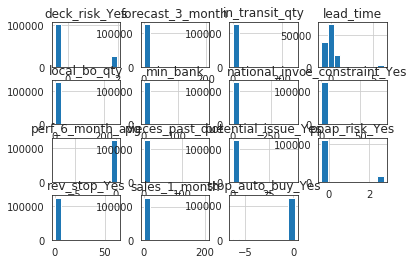

In [367]:
X.hist()

In [436]:
# power transform X
# use method = yeo-johnson or box-cox (box_cox only for strictly positive data)
power = PowerTransformer(method='yeo-johnson', standardize=False)

In [437]:
#Apply power transformation to x
data_trans = power.fit_transform(X)
df_trans = pd.DataFrame(data_trans)

In [438]:
X = df_trans

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa96ea22d0>,
      dtype=object)

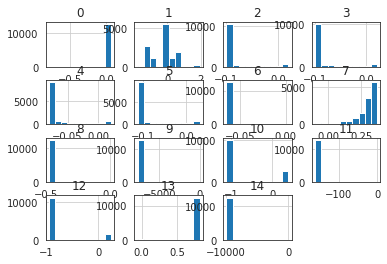

In [439]:
X.hist()

In [440]:
y = data[target]

In [441]:
print(X.shape)
print(y.shape)

(12694, 15)
(12694,)


In [375]:
#Get methods for scoring and unsupervised outlier detection
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [376]:
#Define random state to make results reproducible
state = 7

#Define outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(X),
                                      contamination = outlier_fraction,
                                      random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors = 20,#The higher ther percentage of outliers the higher we set this number
    contamination = outlier_fraction    
    )    
}

In [377]:
#Fit models
n_outliers = len(backorder)

#Looping throgh our classifiers
for c, (clf_name, clf) in enumerate(classifiers.items()):
    
    #fit data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    #Reshape the predictions to 1 for backorder and 0 for notbackorder
    #This is because the models returns 1 for not outliers and 0 for outliers
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    #Get the total number of errors made
    n_errors = (y_pred != y).sum()
    
    #Get classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

Isolation Forest: 1695
0.9866476556591883
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    126051
           1       0.05      0.05      0.05       893

    accuracy                           0.99    126944
   macro avg       0.52      0.52      0.52    126944
weighted avg       0.99      0.99      0.99    126944

Local Outlier Factor: 1783
0.9859544366019662
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    126051
           1       0.01      0.01      0.01       893

    accuracy                           0.99    126944
   macro avg       0.50      0.50      0.50    126944
weighted avg       0.99      0.99      0.99    126944



Precission above improved from 2 to 5% aftera pplying power transformations to the features

In [346]:
#Fit models
n_outliers = len(backorder)

#Looping throgh our classifiers
for c, (clf_name, clf) in enumerate(classifiers.items()):
    
    #fit data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    #Reshape the predictions to 1 for backorder and 0 for notbackorder
    #This is because the models returns 1 for not outliers and 0 for outliers
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    #Get the total number of errors made
    n_errors = (y_pred != y).sum()
    
    #Get classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

Isolation Forest: 1765
0.9860962314091253
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    126051
           1       0.02      0.02      0.02       893

    accuracy                           0.99    126944
   macro avg       0.50      0.50      0.50    126944
weighted avg       0.99      0.99      0.99    126944

Local Outlier Factor: 1785
0.985938681623393
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    126051
           1       0.00      0.00      0.00       893

    accuracy                           0.99    126944
   macro avg       0.50      0.50      0.50    126944
weighted avg       0.99      0.99      0.99    126944



In [ ]:
$$$$$$$NEXT @ 10:00pm 05/25/2020 START BELOW %%%%%% TRY FEATURES SELECTION WITH Wrapper Methods (Step foward)

In [381]:
!conda install -c conda-forge mlxtend -y

Solving environment: done

## Package Plan ##

  environment location: /home/sl202194/miniconda3

  added / updated specs:
    - mlxtend


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mlxtend-0.17.2             |             py_0         1.2 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  mlxtend            conda-forge/noarch::mlxtend-0.17.2-py_0



mlxtend-0.17.2       | 1.2 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [476]:
#Get libs
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler

In [459]:
#Use data from result dataframe processed above
result.head()

national_inv  lead_time  in_transit_qty  forecast_3_month  sales_1_month  \
0     -0.011388   0.017596       -0.030446         -0.037112      -0.021814   
1     -0.016008   0.867532       -0.035059         -0.036521      -0.026375   
2      0.230747   0.017596       -0.028909          0.455410       0.008402   
3      0.010007   0.017596       -0.030446         -0.037112      -0.028085   
4     -0.015844  -0.832339       -0.035059         -0.037112      -0.032076   

   min_bank  pieces_past_due  perf_6_month_avg  local_bo_qty  \
0 -0.026260        -0.009246          0.150422     -0.019581   
1 -0.031637        -0.009246          0.145153      0.045304   
2  0.057084        -0.009246          0.151927     -0.019581   
3 -0.026260        -0.009246          0.139131     -0.019581   
4 -0.047768        -0.009246          0.105257     -0.019581   

   potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0            -0.023405      -0.505066          -0.012521      -0.367299   
1            -0.023405      -0.505066          -0.012521      -0.367299   
2            -0.023405      -0.505066          -0.012521      -0.367299   
3            -0.023405      -0.505066          -0.012521      -0.367299   
4            -0.023405      -0.505066          -0.012521      -0.367299   

   stop_auto_buy_Yes  rev_stop_Yes  went_on_backorder_Yes  
0           0.159142     -0.016003                      0  
1           0.159142     -0.016003                      0  
2           0.159142     -0.016003                      0  
3           0.159142     -0.016003                      0  
4           0.159142     -0.016003                      1

In [461]:
result.shape

(1269437, 16)

In [462]:
#Sample result df to get dataframe of a manageable size
#Sample data to manage training time
data = result.sample(frac=0.01, random_state=7)
print(data.shape)

(12694, 16)


In [390]:
data.head()

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0  1486266         139.0        8.0             6.0               0.0   
1  1468661          -2.0       14.0             0.0               3.0   
2  2140959        7529.0        8.0             8.0            2500.0   
3  2197644         792.0        8.0             6.0               0.0   
4  1943809           3.0        2.0             0.0               0.0   

   sales_1_month  min_bank  pieces_past_due  perf_6_month_avg  local_bo_qty  \
0           18.0      24.0              0.0              0.98           0.0   
1           10.0      18.0              0.0              0.91           2.0   
2           71.0     117.0              0.0              1.00           0.0   
3            7.0      24.0              0.0              0.83           0.0   
4            0.0       0.0              0.0              0.38           0.0   

   potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0                    0              0                  0              0   
1                    0              0                  0              0   
2                    0              0                  0              0   
3                    0              0                  0              0   
4                    0              0                  0              0   

   stop_auto_buy_Yes  rev_stop_Yes  went_on_backorder_Yes  
0                  1             0                      0  
1                  1             0                      0  
2                  1             0                      0  
3                  1             0                      0  
4                  1             0                      1

In [391]:
#Get columns
data.keys()

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'sales_1_month', 'min_bank', 'pieces_past_due',
       'perf_6_month_avg', 'local_bo_qty', 'potential_issue_Yes',
       'deck_risk_Yes', 'oe_constraint_Yes', 'ppap_risk_Yes',
       'stop_auto_buy_Yes', 'rev_stop_Yes', 'went_on_backorder_Yes'],
      dtype='object')

In [393]:
data.shape

(1269437, 17)

In [442]:
#get sample of data
#Let's use X and y transformed and sampled data above
print(X.shape)
print(y.shape)

(12694, 15)
(12694,)


In [443]:
X.head()

0         1         2         3         4         5         6  \
0 -0.017922  0.017439 -0.099773 -0.098919 -0.080478 -0.113075 -0.065351   
1 -0.017537  0.147496 -0.099773 -0.098919 -0.077644 -0.113075 -0.065351   
2 -0.017965 -0.704249 -0.099773 -0.098919 -0.080478 -0.105085 -0.065351   
3 -0.017879  0.457391 -0.099773 -0.098919 -0.080478 -0.113075 -0.065351   
4 -0.017708  0.017439 -0.099773 -0.098919 -0.080478 -0.113075 -0.065351   

          7        8            9       10          11        12        13  \
0  0.304465 -0.47911 -7693.662568 -1.11601 -161.594932 -0.956914  0.822011   
1  0.349784 -0.47911 -7693.662568 -1.11601 -161.594932 -0.956914  0.822011   
2  0.283474 -0.47911 -7693.662568 -1.11601 -161.594932 -0.956914  0.822011   
3  0.367111 -0.47911 -7693.662568 -1.11601 -161.594932 -0.956914  0.822011   
4  0.367111 -0.47911 -7693.662568 -1.11601 -161.594932 -0.956914  0.822011   

            14  
0 -9885.989389  
1 -9885.989389  
2 -9885.989389  
3 -9885.989389  
4 -9885.989389

In [411]:
#Check nulls
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [444]:
columns

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'sales_1_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'local_bo_qty',
 'potential_issue_Yes',
 'deck_risk_Yes',
 'oe_constraint_Yes',
 'ppap_risk_Yes',
 'stop_auto_buy_Yes',
 'rev_stop_Yes']

In [448]:
#Add columns back to X
X = pd.DataFrame(X.values, columns = columns)

In [449]:
X.head()

national_inv  lead_time  in_transit_qty  forecast_3_month  sales_1_month  \
0     -0.017922   0.017439       -0.099773         -0.098919      -0.080478   
1     -0.017537   0.147496       -0.099773         -0.098919      -0.077644   
2     -0.017965  -0.704249       -0.099773         -0.098919      -0.080478   
3     -0.017879   0.457391       -0.099773         -0.098919      -0.080478   
4     -0.017708   0.017439       -0.099773         -0.098919      -0.080478   

   min_bank  pieces_past_due  perf_6_month_avg  local_bo_qty  \
0 -0.113075        -0.065351          0.304465      -0.47911   
1 -0.113075        -0.065351          0.349784      -0.47911   
2 -0.105085        -0.065351          0.283474      -0.47911   
3 -0.113075        -0.065351          0.367111      -0.47911   
4 -0.113075        -0.065351          0.367111      -0.47911   

   potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0         -7693.662568       -1.11601        -161.594932      -0.956914   
1         -7693.662568       -1.11601        -161.594932      -0.956914   
2         -7693.662568       -1.11601        -161.594932      -0.956914   
3         -7693.662568       -1.11601        -161.594932      -0.956914   
4         -7693.662568       -1.11601        -161.594932      -0.956914   

   stop_auto_buy_Yes  rev_stop_Yes  
0           0.822011  -9885.989389  
1           0.822011  -9885.989389  
2           0.822011  -9885.989389  
3           0.822011  -9885.989389  
4           0.822011  -9885.989389

In [463]:
y

963385     0
1035498    0
60108      0
148217     0
36184      0
          ..
432756     0
688185     0
699354     0
1234441    0
1049620    0
Name: went_on_backorder_Yes, Length: 12694, dtype: int64

In [464]:
#reset index
y = y.reset_index(drop=True)

In [466]:
y

0        0
1        0
2        0
3        0
4        0
        ..
12689    0
12690    0
12691    0
12692    0
12693    0
Name: went_on_backorder_Yes, Length: 12694, dtype: int64

In [467]:
#Check nulls
X.isnull().sum()

national_inv           0
lead_time              0
in_transit_qty         0
forecast_3_month       0
sales_1_month          0
min_bank               0
pieces_past_due        0
perf_6_month_avg       0
local_bo_qty           0
potential_issue_Yes    0
deck_risk_Yes          0
oe_constraint_Yes      0
ppap_risk_Yes          0
stop_auto_buy_Yes      0
rev_stop_Yes           0
dtype: int64

In [468]:
print(X.shape)
print(y.shape)

(12694, 15)
(12694,)


In [498]:
#Train, test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7)
print(X_train.shape, X_test.shape)

(10155, 15) (2539, 15)


Note that our task here is to:
    1. Reduce the feature space
    2. Find the best combination of features to predict the output

## Step Forward Feature Selection

In [480]:
#See https://www.youtube.com/watch?v=zW1SvA0Z-l4&feature=youtu.be
#Setting verbose = 2 returns scors as well
sfs = SFS(RandomForestClassifier(n_estimators=100, 
                                random_state=7,
                                n_jobs=-1),
         k_features = 6,
         forward = True,
         floating = False,
         verbose = 2,
         scoring = 'recall',
         cv = 4,
         n_jobs = -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   12.7s finished

[2020-05-26 14:19:09] Features: 1/6 -- score: 0.0[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   16.8s finished

[2020-05-26 14:19:26] Features: 2/6 -- score: 0.0402046783625731[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   16.0s finished

[2020-05-26 14:19:42] Features: 3/6 -- score: 0.0533625730994152[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out 

From above, we see that highest recall achieved was only 8% when at least 4 features were selected

Let's evaluate how recall changes when we select all 15 features

In [481]:
#See https://www.youtube.com/watch?v=zW1SvA0Z-l4&feature=youtu.be
sfs = SFS(RandomForestClassifier(n_estimators=100, 
                                random_state=7,
                                n_jobs=-1),
         k_features = 15,
         forward = True,
         floating = False,
         verbose = 2,
         scoring = 'recall',
         cv = 4,
         n_jobs = -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   16.2s finished

[2020-05-26 14:21:33] Features: 1/15 -- score: 0.0[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   20.2s finished

[2020-05-26 14:21:53] Features: 2/15 -- score: 0.0402046783625731[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   18.2s finished

[2020-05-26 14:22:11] Features: 3/15 -- score: 0.0533625730994152[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 o

Highest recall reached when at least 4 features were selecte but not more than 7

Note that with all 15 features included, recall droped to only 1% (0.0139)

This demonstrates that it is not true always that the maximum number of selected features leads to best performance, the combinatgion of selected features matters as well. 

There are actually a few subset of features that help a model perform really well.

This is why it is helpful to run this test so we can understand how impactful are the features we have in trying to solve the machine learning problem at hand and it is an important tool for a data scientist to have.

Thus, with <b/>Step Forward</b> feature selection, we can perform featugre selection while improving accuracy as well.

Note that <b/>Step Backward</b> folllows the same alrgorithm as Step Forward, but we just set the <b/>forward parameter</b> to <b/>False.</b>

Therefore, with the combination of features we have we can only achieve 8% recall with default RandomForest 
settings. 

So, we migh need to try either, 
    1. A different algorithm
    2. Engineer more relevant features
    
But first, let's identified the <b/>best combination of selected features.</b>

#### Note: Observe changes in traing time as well depending on number of selected features combination

## Get Selected Features

In [483]:
#Here we just change k to the number of desired features
#Selecting 7 as 7 is the upper limit of our best performance
sfs = SFS(RandomForestClassifier(n_estimators=100, 
                                random_state=7,
                                n_jobs=-1),
         k_features = 7,
         forward = True,
         floating = False,
         verbose = 2,
         scoring = 'recall',
         cv = 4,
         n_jobs = -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   18.2s finished

[2020-05-26 14:45:12] Features: 1/7 -- score: 0.0[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   20.2s finished

[2020-05-26 14:45:32] Features: 2/7 -- score: 0.0402046783625731[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   17.6s finished

[2020-05-26 14:45:50] Features: 3/7 -- score: 0.0533625730994152[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out 

In [484]:
#Get selected feature names
sfs.k_feature_names_

('national_inv',
 'in_transit_qty',
 'sales_1_month',
 'perf_6_month_avg',
 'local_bo_qty',
 'potential_issue_Yes',
 'stop_auto_buy_Yes')

In [486]:
#Let's get feature indexes
sfs.k_feature_idx_

(0, 2, 4, 7, 8, 9, 13)

In [487]:
#Let's get our scores with those seven features
sfs.k_score_

0.08040935672514621

Here we see that the <b/>maximum recall</b> obtained by the above 7 features is 8%

Let's set up a pandas dataframe to view our results more intuitively.

We do this  using a <b/>.from_dict()</b> method with an SFS dictionary object that has the information we need

In [488]:
#Get performance metrics dataframe
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

feature_idx                                          cv_scores  \
1                    (0,)                               [0.0, 0.0, 0.0, 0.0]   
2                  (0, 4)  [0.0, 0.05263157894736842, 0.05263157894736842...   
3               (0, 4, 7)  [0.0, 0.10526315789473684, 0.05263157894736842...   
4            (0, 2, 4, 7)  [0.05555555555555555, 0.10526315789473684, 0.1...   
5         (0, 2, 4, 7, 8)  [0.05555555555555555, 0.10526315789473684, 0.1...   
6      (0, 2, 4, 7, 8, 9)  [0.05555555555555555, 0.10526315789473684, 0.1...   
7  (0, 2, 4, 7, 8, 9, 13)  [0.05555555555555555, 0.10526315789473684, 0.1...   

   avg_score                                      feature_names   ci_bound  \
1          0                                    (national_inv,)          0   
2  0.0402047                      (national_inv, sales_1_month)  0.0372579   
3  0.0533626    (national_inv, sales_1_month, perf_6_month_avg)  0.0596913   
4  0.0804094  (national_inv, in_transit_qty, sales_1_month, ...  0.0398402   
5  0.0804094  (national_inv, in_transit_qty, sales_1_month, ...  0.0398402   
6  0.0804094  (national_inv, in_transit_qty, sales_1_month, ...  0.0398402   
7  0.0804094  (national_inv, in_transit_qty, sales_1_month, ...  0.0398402   

     std_dev    std_err  
1          0          0  
2  0.0232429  0.0134193  
3  0.0372377  0.0214992  
4  0.0248538  0.0143493  
5  0.0248538  0.0143493  
6  0.0248538  0.0143493  
7  0.0248538  0.0143493

From above we see that for example, 

When 4 feature indexes (0,2,4, and 7) with thier names under the <b/>feature names</b> column, the model achieved an average score (recall) of 0.0804094

Therefore, this method is very helpful for a data scientist during feature selection by providing intuition on how the features selected impact model performance

We can extract the feature names from our score metrics dataframe by assighning our dataframe to a variable and using .iloc() to slice our results as below. 

In [489]:
scores = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [492]:
#Get the feature names of the combiination of four features
scores.iloc[4, 3]

('national_inv',
 'in_transit_qty',
 'sales_1_month',
 'perf_6_month_avg',
 'local_bo_qty')

Practically, the combination of these four features can only explain 8% of the variablilty in back order

Thereferore, we need to either:
    1. Think of additional features that can help explain most of the remaing 92% of unexplained variablity in back order
    2. Try to identify a better algorithm that can identify relationships in our data better (here we'll try CNN, see https://www.youtube.com/watch?v=Y6UDeGRyNZk)

## Automating Feature Selection

Below is how we can select the best features with a program

In [494]:
#We just assign an interval to the parameter k_features
#We want SFS to evaluate performance from k = 1 feature to 7 features, i.e. use (1,7)
#This returns he best score for these selected feature combinations
sfs = SFS(RandomForestClassifier(n_estimators=100, 
                                random_state=7,
                                n_jobs=-1),
         k_features = (1,7),
         forward = True,
         floating = False,
         verbose = 2,
         scoring = 'recall',
         cv = 4,
         n_jobs = -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   13.5s finished

[2020-05-26 15:21:30] Features: 1/7 -- score: 0.0[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   17.9s finished

[2020-05-26 15:21:48] Features: 2/7 -- score: 0.0402046783625731[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   20.7s finished

[2020-05-26 15:22:09] Features: 3/7 -- score: 0.0533625730994152[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out 

So here we see a total of 7 features are selected with a maximum score (recall) of .0804

In [495]:
#Get best k score
sfs.k_score_

0.08040935672514621

In [496]:
#Get best k feature names
sfs.k_feature_names_

('national_inv', 'in_transit_qty', 'sales_1_month', 'perf_6_month_avg')

So, from above we see how we can automatically get feature names of the best feature combination selected

Let's try to use a statified split and see if this might improve recall

In [501]:
#Train, test split
#Set stratify = yes so we can ensre same ratio of target instances
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7, stratify=y)
print(X_train.shape, X_test.shape)

(10155, 15) (2539, 15)


In [499]:
#Trying with stratified set
#We just assign an interval to the parameter k_features
#We want SFS to evaluate performance from k = 1 feature to 7 features, i.e. use (1,7)
#This returns he best score for these selected feature combinations
sfs = SFS(RandomForestClassifier(n_estimators=100, 
                                random_state=7,
                                n_jobs=-1),
         k_features = (1,7),
         forward = True,
         floating = False,
         verbose = 2,
         scoring = 'recall',
         cv = 4,
         n_jobs = -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   13.4s finished

[2020-05-26 15:53:41] Features: 1/7 -- score: 0.0[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   21.1s finished

[2020-05-26 15:54:02] Features: 2/7 -- score: 0.044117647058823525[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   17.2s finished

[2020-05-26 15:54:19] Features: 3/7 -- score: 0.07352941176470588[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 o

Note that with a startified split, recall improved to 14%

Let's observe change of recall with all 15 features selected using a stratified split

In [500]:
#See https://www.youtube.com/watch?v=zW1SvA0Z-l4&feature=youtu.be
sfs = SFS(RandomForestClassifier(n_estimators=100, 
                                random_state=7,
                                n_jobs=-1),
         k_features = 15,
         forward = True,
         floating = False,
         verbose = 2,
         scoring = 'recall',
         cv = 4,
         n_jobs = -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.0s finished

[2020-05-26 15:58:22] Features: 1/15 -- score: 0.0[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   20.2s finished

[2020-05-26 15:58:42] Features: 2/15 -- score: 0.044117647058823525[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   22.6s finished

[2020-05-26 15:59:05] Features: 3/15 -- score: 0.07352941176470588[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   

Here we see that maximum possible recall score is 14.54% with 5 to 7 and 9 features

Thus, <b/>stratifying our training and test sets improved recall significantly (from 7% to 14%)</b>

Meaning we are twice as likely to identify a backoder from a non back order item

Let's get the feature names and score automatically

In [505]:
#We just assign an interval to the parameter k_features
#We want SFS to evaluate performance from k = 1 feature to 7 features, i.e. use (1,7)
#This returns he best score for these selected feature combinations
#We choose 9 features as training time is 9.6 seconds with 9 features selected versus 18sec with 7 features
sfs = SFS(RandomForestClassifier(n_estimators=100, 
                                random_state=7,
                                n_jobs=-1),
         k_features = (8,9),
         forward = True,
         floating = False,
         verbose = 2,
         scoring = 'recall',
         cv = 4,
         n_jobs = -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   12.9s finished

[2020-05-26 16:11:33] Features: 1/9 -- score: 0.0[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   18.6s finished

[2020-05-26 16:11:52] Features: 2/9 -- score: 0.044117647058823525[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   17.8s finished

[2020-05-26 16:12:10] Features: 3/9 -- score: 0.07352941176470588[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 o

In [506]:
#Get best k score
sfs.k_score_

0.14542483660130717

In [507]:
#Get best k feature names
sfs.k_feature_names_

('national_inv',
 'in_transit_qty',
 'sales_1_month',
 'pieces_past_due',
 'potential_issue_Yes',
 'oe_constraint_Yes',
 'ppap_risk_Yes',
 'stop_auto_buy_Yes',
 'rev_stop_Yes')

Thereferore, next we either:
    1. Think of additional features that can help explain most of the remaing 92% of unexplained variablity in back order, or
    
    2. Try to identify a better algorithm that can identify relationships in our data better (here we'll try CNN, see https://www.youtube.com/watch?v=Y6UDeGRyNZk)

In [ ]:
$$$$$$$$$$$$$$$$$$@8:59pm 05/26/2020 START BELOW EVALUATE LEARNING CURVE

## Evaluating the Learning Curve

In [508]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

In [510]:
#Get data
result.head()

national_inv  lead_time  in_transit_qty  forecast_3_month  sales_1_month  \
0     -0.011388   0.017596       -0.030446         -0.037112      -0.021814   
1     -0.016008   0.867532       -0.035059         -0.036521      -0.026375   
2      0.230747   0.017596       -0.028909          0.455410       0.008402   
3      0.010007   0.017596       -0.030446         -0.037112      -0.028085   
4     -0.015844  -0.832339       -0.035059         -0.037112      -0.032076   

   min_bank  pieces_past_due  perf_6_month_avg  local_bo_qty  \
0 -0.026260        -0.009246          0.150422     -0.019581   
1 -0.031637        -0.009246          0.145153      0.045304   
2  0.057084        -0.009246          0.151927     -0.019581   
3 -0.026260        -0.009246          0.139131     -0.019581   
4 -0.047768        -0.009246          0.105257     -0.019581   

   potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0            -0.023405      -0.505066          -0.012521      -0.367299   
1            -0.023405      -0.505066          -0.012521      -0.367299   
2            -0.023405      -0.505066          -0.012521      -0.367299   
3            -0.023405      -0.505066          -0.012521      -0.367299   
4            -0.023405      -0.505066          -0.012521      -0.367299   

   stop_auto_buy_Yes  rev_stop_Yes  went_on_backorder_Yes  
0           0.159142     -0.016003                      0  
1           0.159142     -0.016003                      0  
2           0.159142     -0.016003                      0  
3           0.159142     -0.016003                      0  
4           0.159142     -0.016003                      1

In [512]:
result.shape

(1269437, 16)

In [531]:
#Sample data
data = result.sample(frac=0.01, random_state=7)
print(data.shape)

(12694, 16)


In [533]:
#Get X and y
X = data.drop('went_on_backorder_Yes', axis=1)
y = data['went_on_backorder_Yes']

In [524]:
#Getting list of 9 features returned by step forward feature selector above
list(sfs.k_feature_names_)

['national_inv',
 'in_transit_qty',
 'sales_1_month',
 'pieces_past_due',
 'potential_issue_Yes',
 'oe_constraint_Yes',
 'ppap_risk_Yes',
 'stop_auto_buy_Yes',
 'rev_stop_Yes']

In [534]:
#Selecting X impactful features
X = X[list(sfs.k_feature_names_)]

In [535]:
X.shape

(12694, 9)

In [536]:
print(X.shape, y.shape)

(12694, 9) (12694,)


In [537]:
#call learning curve
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=10,
                                                        scoring='recall', 
                                                        n_jobs=-1,
                                                        train_sizes=np.linspace(0.01, 1, 50),
                                                        verbose=1)

[learning_curve] Training set sizes: [  114   345   575   806  1037  1268  1499  1729  1960  2191  2422  2653
  2883  3114  3345  3576  3807  4038  4268  4499  4730  4961  5192  5422
  5653  5884  6115  6346  6576  6807  7038  7269  7500  7731  7961  8192
  8423  8654  8885  9115  9346  9577  9808 10039 10269 10500 10731 10962
 11193 11424]


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.8min finished


In [538]:
#Get mean value of training scores
#This returns training values of the 50 iterations (50 sub samples)
train_mean = np.mean(train_scores, axis=1)
train_mean

array([0.        , 1.        , 1.        , 1.        , 0.8875    ,
       0.73214286, 0.75714286, 0.77492063, 0.79384615, 0.81608392,
       0.71848739, 0.70230263, 0.685     , 0.76666667, 0.72813853,
       0.72173913, 0.71505017, 0.71762312, 0.69310345, 0.71275862,
       0.72903226, 0.728125  , 0.69781746, 0.64834835, 0.63117559,
       0.65363636, 0.64891194, 0.66700228, 0.61087868, 0.59570938,
       0.59568215, 0.58795221, 0.57927562, 0.57022329, 0.55678204,
       0.53276562, 0.53475317, 0.53347788, 0.53186321, 0.51410795,
       0.5121875 , 0.50135337, 0.50718244, 0.51894359, 0.49659933,
       0.49788967, 0.49927953, 0.47831488, 0.48183483, 0.48051948])

In [539]:
#Get training scores standard deviations
#Returns standard deviations of training scores in the 50 cross validation sets of ten iterations
train_std = np.std(train_scores, axis=1)
train_std

array([0.        , 0.        , 0.        , 0.        , 0.0375    ,
       0.05357143, 0.06190476, 0.06815349, 0.01230769, 0.01770488,
       0.01560855, 0.02261139, 0.03051639, 0.02564364, 0.02379378,
       0.03984848, 0.03650851, 0.03049425, 0.03253097, 0.01756365,
       0.02398177, 0.02166244, 0.03416843, 0.0283048 , 0.05015214,
       0.05826521, 0.05760301, 0.06023322, 0.0290934 , 0.03942334,
       0.03009427, 0.0280029 , 0.02949684, 0.02852887, 0.03051016,
       0.03643126, 0.03455959, 0.03070016, 0.0322631 , 0.03035352,
       0.03093985, 0.02325804, 0.02325684, 0.02576329, 0.02303072,
       0.02509368, 0.02286111, 0.02489991, 0.02343202, 0.02205772])

In [540]:
#Get score means from the test set
test_mean = np.mean(test_scores, axis=1)
test_mean

array([0.        , 0.03472222, 0.        , 0.0125    , 0.        ,
       0.025     , 0.0125    , 0.01111111, 0.0125    , 0.        ,
       0.0125    , 0.        , 0.        , 0.02361111, 0.025     ,
       0.025     , 0.03611111, 0.04861111, 0.04861111, 0.03611111,
       0.03611111, 0.03611111, 0.05972222, 0.04722222, 0.08333333,
       0.07083333, 0.05833333, 0.05833333, 0.05833333, 0.05833333,
       0.03472222, 0.04722222, 0.04722222, 0.04722222, 0.04583333,
       0.05972222, 0.05972222, 0.04722222, 0.03472222, 0.04722222,
       0.05972222, 0.03472222, 0.04722222, 0.05833333, 0.06944444,
       0.06944444, 0.06944444, 0.06944444, 0.06944444, 0.06944444])

In [541]:
#Note that these are recall scores
#Get standard deviations on the test data
test_std = np.std(test_scores, axis=1)
test_std

array([0.        , 0.05316016, 0.        , 0.0375    , 0.        ,
       0.05      , 0.0375    , 0.03333333, 0.0375    , 0.        ,
       0.0375    , 0.        , 0.        , 0.04732424, 0.05      ,
       0.05      , 0.05527708, 0.0817559 , 0.0817559 , 0.05527708,
       0.05527708, 0.05527708, 0.08194444, 0.0580017 , 0.09622504,
       0.0806154 , 0.05853141, 0.05853141, 0.05853141, 0.05853141,
       0.05316016, 0.0580017 , 0.0580017 , 0.0580017 , 0.07506427,
       0.08194444, 0.08194444, 0.0580017 , 0.05316016, 0.0580017 ,
       0.08194444, 0.05316016, 0.0580017 , 0.07677931, 0.10318986,
       0.10318986, 0.10318986, 0.10318986, 0.10318986, 0.10318986])

## Learning Curves

[]

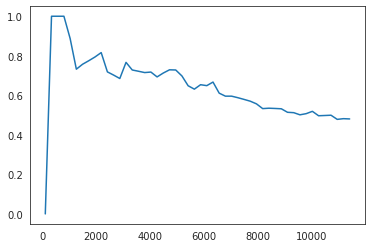

In [542]:
#Plot training accuracy
plt.plot(train_sizes, train_mean)
plt.plot()

[]

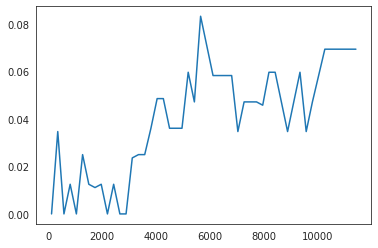

In [544]:
#Plot the testing accuracy
plt.plot(train_sizes, test_mean)
plt.plot()

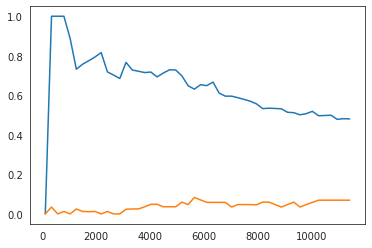

In [543]:
#Plot both training and testing accuracy
plt.plot(train_sizes, train_mean)
plt.plot(train_sizes, test_mean)

Here we see that as we are increasing the training sample size, the testing accuracy is incraesing(orange curve)

But the training accuracy is decreasing (blue curve)

This shows that increasing our sample size (training data) infinitely does not guarantee that our performance will improve

This means <b/>there is a limit on the model complexity and size of the dataset from where we cannot increase or improve the accracy</b>.

When that limit is reached, we need to <b/>work on a different model</b> instead of increasing the size of the dataset.

That <b/>limit is when the train curve (blue) crosses the test accuracy curve(orange).</b>

That is we can continue to increase our training data as long as the limit has not been reached. 

### How to Pretify the Learning Curve Output

To do so we add a few parameters to our plt code

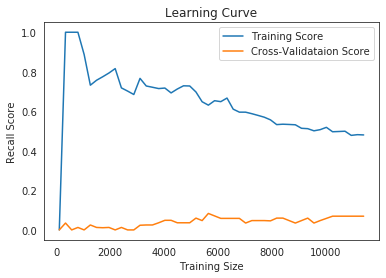

In [549]:
#Plot both training and testing accuracy
plt.plot(train_sizes, train_mean, label ='Training Score')
plt.plot(train_sizes, test_mean, label ='Cross-Validataion Score')


plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Recall Score')
plt.legend(loc = 'best')

## Adding Standard Deviation Plots

This will help us see how accuracy of the training and test varies through cross-validation folds 

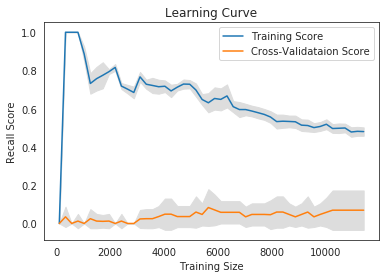

In [550]:
#Plot both training and testing accuracy
plt.plot(train_sizes, train_mean, label ='Training Score')
plt.plot(train_sizes, test_mean, label ='Cross-Validataion Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color= '#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color= '#DDDDDD')


plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Recall Score')
plt.legend(loc = 'best')

We have ploted a learning curve for a RandomForestClasifier using recal above

We still see that we have room to increase the size of our training dataset to improve model performance

In [ ]:
$$$$$$$$$$$$$$$$$$@8:59pm 05/26/2020 END ABOVE EVALUATE LEARNING CURVE

In [ ]:
$$$$$$$END @ 10:00pm 05/25/2020 ABOVE %%%%%% TRY FEATURES SELECTION WITH Wrapper Methods (Step foward)

In [ ]:
$$$$$$$$$$$$$$$END ABOVE @3:33pm 05/25/2020 try train withanomally detection methods

## Validate Model

In [85]:
from helpers import helpers

In [147]:
validate_data = pd.read_csv('derived_data/validate_data.csv')
validate_data.shape

(337573, 23)

In [148]:
#Are there any missing values
helpers.check_missing(validate_data)


***************** Total and Percentage of Missing Values Found *****************

           Total   Percent
lead_time  20043  0.059374


In [149]:
# Delete all remaining rows with missing values
validate_data.dropna(axis = 0, how = 'any', inplace = True)

In [150]:
#Saity check
helpers.check_missing(validate_data)

No Missing Values found.


In [151]:
validate_data.shape

(317530, 23)

In [152]:
#sample data to manage training time
val_data = validate_data.sample(frac=0.01)
print(val_data.shape)

(3175, 23)


In [153]:
val_data.head()

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
41687   3223412          25.0        8.0             0.0               0.0   
237290  2104897          10.0       12.0             0.0               0.0   
81831   1902509           1.0        8.0             0.0               0.0   
143695  2082713         458.0       12.0             0.0               0.0   
288756  1458332         194.0        8.0            25.0             269.0   

        forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
41687               30.0              60.0            3.0           14.0   
237290               0.0               0.0            0.0            0.0   
81831                0.0               0.0            0.0            0.0   
143695               0.0               0.0            0.0            0.0   
288756             593.0             868.0           42.0          358.0   

        sales_6_month  sales_9_month  min_bank  pieces_past_due  \
41687            39.0           50.0       3.0              0.0   
237290            0.0            0.0       1.0              0.0   
81831             0.0            0.0       0.0              0.0   
143695            0.0            0.0       0.0              0.0   
288756          875.0         1181.0     108.0              0.0   

        perf_6_month_avg  perf_12_month_avg  local_bo_qty  \
41687               0.99               0.99           0.0   
237290              0.48               0.48           0.0   
81831               0.98               0.98           0.0   
143695              0.57               0.70           0.0   
288756              0.86               0.91           0.0   

        potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
41687                     0              0                  0              0   
237290                    0              1                  0              0   
81831                     0              1                  0              0   
143695                    0              0                  0              0   
288756                    0              0                  0              0   

        stop_auto_buy_Yes  rev_stop_Yes  went_on_backorder_Yes  
41687                   1             0                      0  
237290                  1             0                      0  
81831                   1             0                      0  
143695                  1             0                      0  
288756                  1             0                      0

In [154]:
#get y
y = val_data['went_on_backorder_Yes'].values

In [155]:
#get X
X = val_data.drop('went_on_backorder_Yes', axis = 1)

In [156]:
#get y_pred
y_pred = clf.predict(X)

In [157]:
#Import module
from sklearn.metrics import confusion_matrix

In [158]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)

[[3154    0]
 [  21    0]]


In [ ]:
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$@4:44 05/24/2020 END ABOVE HANDLING UNBALNCED CLASSES WITH SMOTE

# Correlations

Are there any variables with significant linear correlation with our target variable?

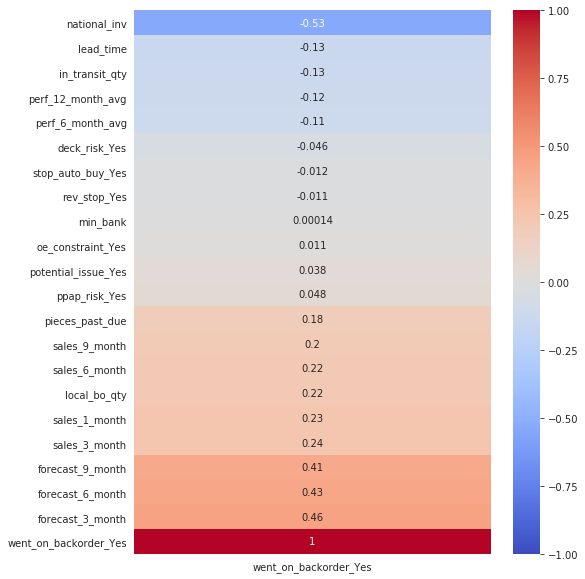

In [21]:
#Correlation of numerical variables with the target variable
helpers.heatmap_numeric_w_dependent_variable(df, 'spearman', 'went_on_backorder_Yes')

# Multicollinearity

The presence of multicollinear variables can adversly impact the performance of our model.

Are there any multicolliner variables?

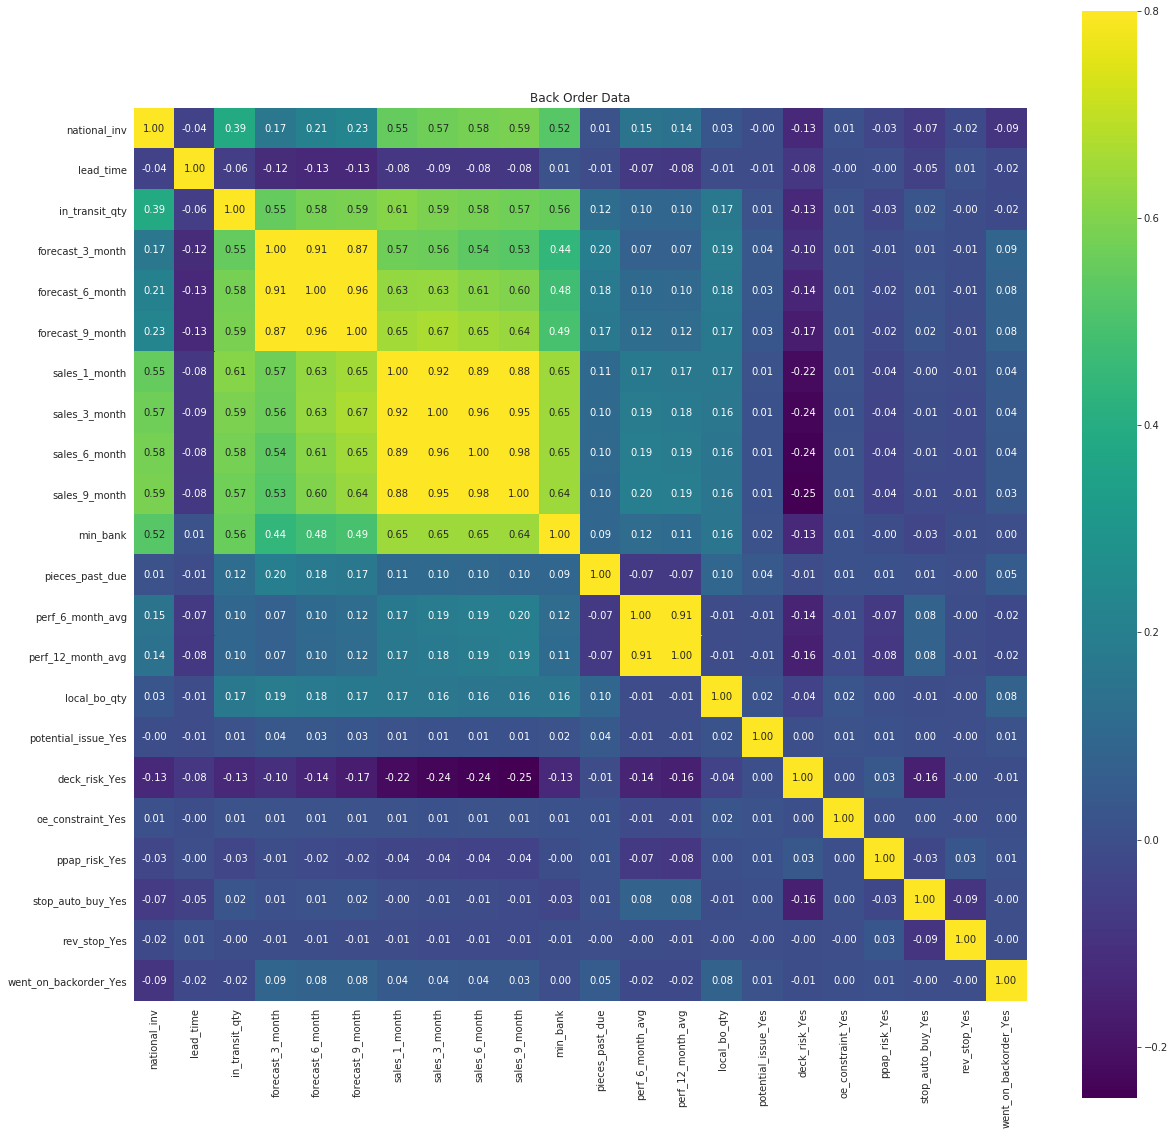

In [312]:
#We'll use the 'spearman' method because of the presence of categorical variables in our dataset
df_corr = df.corr(method= 'spearman')

plt.figure(figsize=(20,20))

sns.heatmap(df_corr, vmax=.8, square=True, 
            annot=True, fmt='.2f', cmap = 'viridis')

plt.title('Back Order Data')

plt.show()

In [315]:
from helpers import helpers

In [316]:
#Let's get multicollinear features
helpers.get_multicollinear_feats(df, target = 'went_on_backorder_Yes')

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0        1486266         139.0        8.0             6.0               0.0   
1        1468661          -2.0       14.0             0.0               3.0   
2        2140959        7529.0        8.0             8.0            2500.0   
3        2197644         792.0        8.0             6.0               0.0   
4        1943809           3.0        2.0             0.0               0.0   
...          ...           ...        ...             ...               ...   
1350283  1883437       19124.0        2.0            10.0               0.0   
1350284  2887586         131.0        2.0            45.0              50.0   
1350285  1206520           8.0        4.0             0.0               0.0   
1350286  2925232           1.0       12.0             0.0               2.0   
1350287  1686955          64.0       12.0             0.0               0.0   

         forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
0                   350.0             350.0           18.0           52.0   
1                    24.0              32.0           10.0           31.0   
2                  2500.0            2500.0           71.0          114.0   
3                     0.0               0.0            7.0           41.0   
4                     0.0               0.0            0.0            2.0   
...                   ...               ...            ...            ...   
1350283               0.0               0.0            7.0           34.0   
1350284             100.0             200.0           26.0          172.0   
1350285               0.0               0.0            0.0            0.0   
1350286               2.0               3.0            0.0            2.0   
1350287               0.0               0.0            0.0            0.0   

         sales_6_month  sales_9_month  min_bank  pieces_past_due  \
0                115.0          185.0      24.0              0.0   
1                 33.0           33.0      18.0              0.0   
2               1563.0         2419.0     117.0              0.0   
3                 99.0          192.0      24.0              0.0   
4                  6.0            6.0       0.0              0.0   
...                ...            ...       ...              ...   
1350283           59.0          139.0      56.0              0.0   
1350284          246.0          320.0      41.0              0.0   
1350285            0.0            0.0       0.0              0.0   
1350286            2.0            2.0       0.0              0.0   
1350287            0.0            0.0       0.0              0.0   

         perf_6_month_avg  perf_12_month_avg  local_bo_qty  \
0                    0.98               0.99           0.0   
1                    0.91               0.88           2.0   
2                    1.00               1.00           0.0   
3                    0.83               0.91           0.0   
4                    0.38               0.40           0.0   
...                   ...                ...           ...   
1350283              0.21               0.24           0.0   
1350284              0.96               0.96           0.0   
1350285              0.77               0.80           0.0   
1350286              0.57               0.68           0.0   
1350287              0.93               0.89           0.0   

         potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0                          0              0                  0              0   
1                          0              0                  0              0   
2                          0              0                  0              0   
3                          0              0                  0              0   
4                          0              0                  0              0   
...                      ...            ...                ...            ...   
1350283   

We'll remove these variables with high multicollinearity from our dataset

## Handling Multicollinear Variables

In [317]:
#Delete one of the identified multicollinear features
#del df['previously_shoped']
del df['forecast_6_month']
del df['forecast_9_month']
del df['perf_12_month_avg']
del df['sales_3_month']
del df['sales_6_month']
del df['sales_9_month']

In [24]:
df = helpers.drop_correlated_feats(df, target = 'went_on_backorder_Yes')

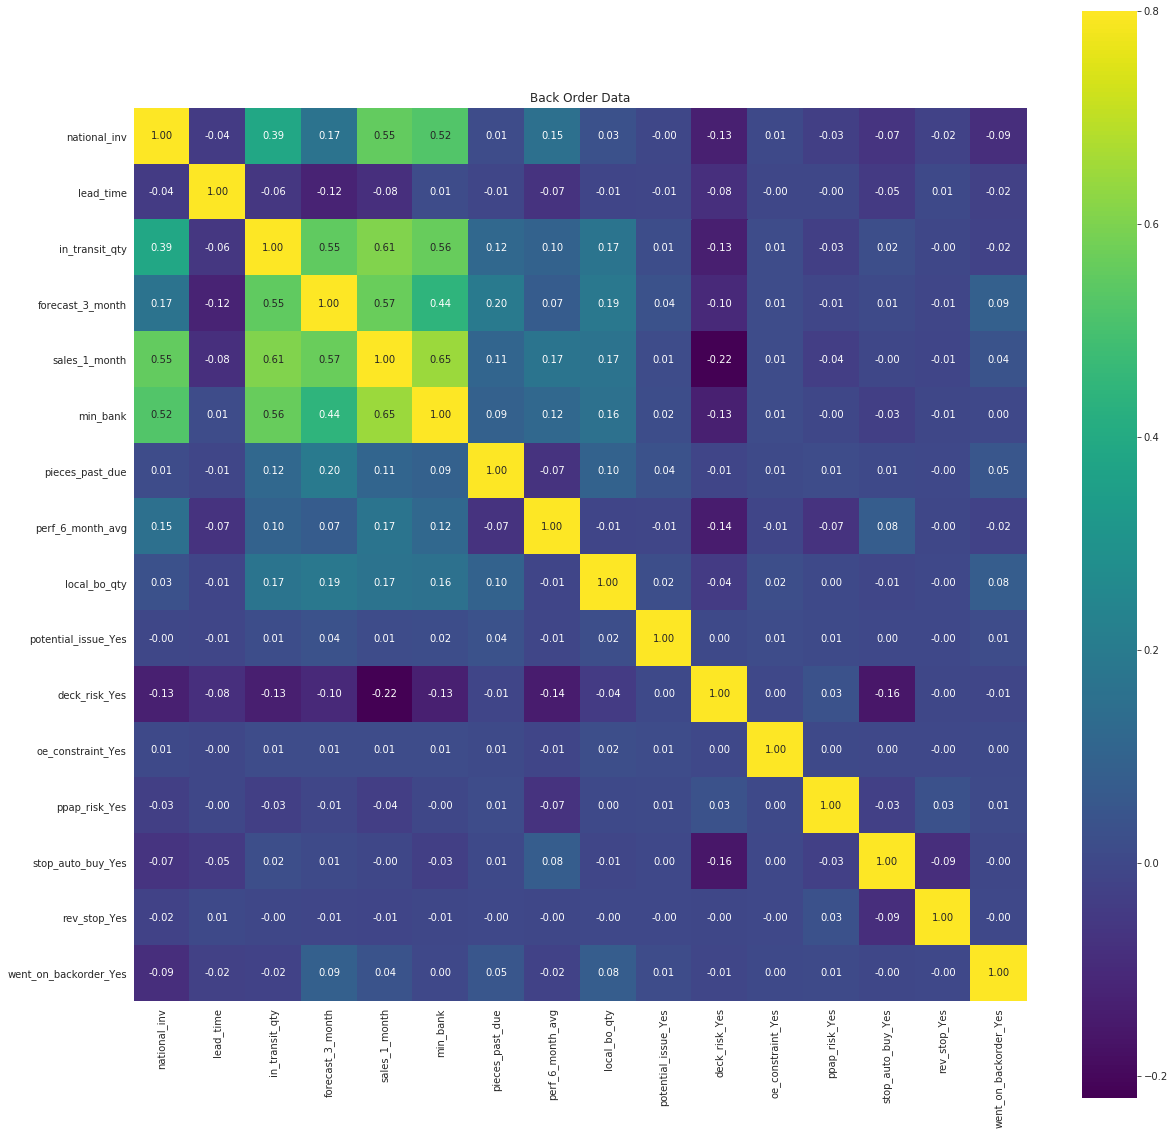

In [318]:
#sanity check multicollinearity
#We'll use the 'spearman' method because of the presence of categorical variables in our dataset
df_corr = df.corr(method= 'spearman')

plt.figure(figsize=(20,20))

sns.heatmap(df_corr, vmax=.8, square=True, 
            annot=True, fmt='.2f', cmap = 'viridis')

plt.title('Back Order Data')

plt.show()

In [319]:
df.shape

(1269437, 17)

In [320]:
df.head()

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0  1486266         139.0        8.0             6.0               0.0   
1  1468661          -2.0       14.0             0.0               3.0   
2  2140959        7529.0        8.0             8.0            2500.0   
3  2197644         792.0        8.0             6.0               0.0   
4  1943809           3.0        2.0             0.0               0.0   

   sales_1_month  min_bank  pieces_past_due  perf_6_month_avg  local_bo_qty  \
0           18.0      24.0              0.0              0.98           0.0   
1           10.0      18.0              0.0              0.91           2.0   
2           71.0     117.0              0.0              1.00           0.0   
3            7.0      24.0              0.0              0.83           0.0   
4            0.0       0.0              0.0              0.38           0.0   

   potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0                    0              0                  0              0   
1                    0              0                  0              0   
2                    0              0                  0              0   
3                    0              0                  0              0   
4                    0              0                  0              0   

   stop_auto_buy_Yes  rev_stop_Yes  went_on_backorder_Yes  
0                  1             0                      0  
1                  1             0                      0  
2                  1             0                      0  
3                  1             0                      0  
4                  1             0                      1

In [48]:
df.previously_shoped.unique()

array([0., 1.])

In [50]:
df.female.unique()

array([1, 0])

In [76]:
df.head()

date  client_id  previously_shoped  member  promotion  \
0  2018-08-31       1752                0.0     0.0        0.0   
1  2018-05-31      15377                0.0     0.0        1.0   
2  2018-02-28       1615                1.0     0.0        0.0   
3  2017-11-30      18947                0.0     0.0        1.0   
4  2018-02-28       2886                0.0     1.0        1.0   

   shop_competitor  prize_won  require_financing  did_a_purchase  \
0              0.0        0.0                0.0             1.0   
1              0.0        1.0                1.0             1.0   
2              1.0        1.0                0.0             1.0   
3              1.0        0.0                0.0             1.0   
4              0.0        1.0                0.0             1.0   

   promotions_used  LT_clients  prize_amount  amount_financing  \
0              1.0        11.0      0.000000           0.00000   
1              3.0         8.0     76.180556       24666.66667   
2              3.0        14.0      0.000000           0.00000   
3              1.0         2.0    153.750000           0.00000   
4              2.0         7.0    135.833333           0.00000   

   amount_purchase  nb_electronics  female  email  live_with_parents  work  \
0           2080.0             1.0     0.0      1                  0     2   
1           1820.0             0.0     0.0      1                  0     1   
2            990.0             0.0     1.0      1                  1     6   
3           3050.0             1.0     0.0      1                  1     1   
4           2760.0             0.0     0.0      1                  0     6   

   family  state  education  age  monthly_spent_electronics    year  month  \
0       0      4          2   41                4750.000000  2018.0    8.0   
1       0      1          1   26                 833.333333  2018.0    5.0   
2       0      5          4   37                6833.333333  2018.0    2.0   
3       0      6          1   32                5916.666667  2017.0   11.0   
4       1      1          1   53                5000.000000  2018.0    2.0   

   got_a_TV  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0

In [78]:
df.female.count()

29338

In [79]:
df.previously_shoped.count()

29338

Multicolinear variables identified:
    * ####previosly_shopped vs. female 99%####
    * promotion vs. price amount 96%
    * require_financing vs. amount_financing 98%
    * promtions_used vs. nb_electronics 89%
Let's use Variance Inflation Factors (VIF) to identifiy impactful multicolinear relationships

In [51]:
#Get list of column names
names = []
for name in numeric_df.columns:
    names.append(name)

In [52]:
numeric_df.head()

client_id  previously_shoped  member  promotion  shop_competitor  \
0   0.689346                0.0     1.0        0.0              0.0   
1   0.409195                0.0     0.0        1.0              1.0   
2   0.656206                0.0     0.0        0.0              1.0   
3   0.006589                0.0     0.0        0.0              1.0   
4   0.937918                0.0     1.0        0.0              0.0   

   prize_won  require_financing  got_a_TV  did_a_purchase  promotions_used  \
0        0.0                0.0       0.0             1.0         0.000000   
1        0.0                1.0       1.0             1.0         0.083333   
2        1.0                0.0       0.0             1.0         0.083333   
3        1.0                0.0       0.0             1.0         0.083333   
4        0.0                0.0       0.0             1.0         0.000000   

   LT_clients  prize_amount  amount_financing  amount_purchase  \
0    0.131783      0.000000          0.000000         0.192523   
1    0.085271      0.122257          0.145911         0.057944   
2    0.100775      0.000000          0.000000         0.111526   
3    0.046512      0.000000          0.000000         0.146417   
4    0.015504      0.000000          0.000000         0.165109   

   nb_electronics  female  email  live_with_parents  education       age  \
0             1.0     1.0    1.0                0.0       0.50  0.605634   
1             0.0     0.0    1.0                0.0       0.75  0.112676   
2             0.0     0.0    1.0                0.0       0.50  0.225352   
3             0.0     0.0    1.0                0.0       0.00  0.394366   
4             1.0     0.0    0.0                0.0       0.75  0.126761   

   monthly_spent_electronics  year     month  outlier  
0                   0.040998   1.0  0.000000        0  
1                   0.051693   1.0  0.818182        0  
2                   0.034759   1.0  0.727273        0  
3                   0.043672   1.0  0.454545        0  
4                   0.057041   0.0  1.000000        0

In [53]:
#df1 = numeric_df.drop('date', axis=1)
df1 = numeric_df.copy()

In [54]:
df1.head()

client_id  previously_shoped  member  promotion  shop_competitor  \
0   0.689346                0.0     1.0        0.0              0.0   
1   0.409195                0.0     0.0        1.0              1.0   
2   0.656206                0.0     0.0        0.0              1.0   
3   0.006589                0.0     0.0        0.0              1.0   
4   0.937918                0.0     1.0        0.0              0.0   

   prize_won  require_financing  got_a_TV  did_a_purchase  promotions_used  \
0        0.0                0.0       0.0             1.0         0.000000   
1        0.0                1.0       1.0             1.0         0.083333   
2        1.0                0.0       0.0             1.0         0.083333   
3        1.0                0.0       0.0             1.0         0.083333   
4        0.0                0.0       0.0             1.0         0.000000   

   LT_clients  prize_amount  amount_financing  amount_purchase  \
0    0.131783      0.000000          0.000000         0.192523   
1    0.085271      0.122257          0.145911         0.057944   
2    0.100775      0.000000          0.000000         0.111526   
3    0.046512      0.000000          0.000000         0.146417   
4    0.015504      0.000000          0.000000         0.165109   

   nb_electronics  female  email  live_with_parents  education       age  \
0             1.0     1.0    1.0                0.0       0.50  0.605634   
1             0.0     0.0    1.0                0.0       0.75  0.112676   
2             0.0     0.0    1.0                0.0       0.50  0.225352   
3             0.0     0.0    1.0                0.0       0.00  0.394366   
4             1.0     0.0    0.0                0.0       0.75  0.126761   

   monthly_spent_electronics  year     month  outlier  
0                   0.040998   1.0  0.000000        0  
1                   0.051693   1.0  0.818182        0  
2                   0.034759   1.0  0.727273        0  
3                   0.043672   1.0  0.454545        0  
4                   0.057041   0.0  1.000000        0

In [55]:
df1.shape

(16036, 24)

In [56]:
Y = df['got_a_TV'].values

X = df1.drop('got_a_TV', axis=1).values

In [57]:
X

array([[0.6893455 , 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.40919518, 0.        , 0.        , ..., 1.        , 0.81818182,
        0.        ],
       [0.65620577, 0.        , 0.        , ..., 1.        , 0.72727273,
        0.        ],
       ...,
       [0.98238079, 0.        , 0.        , ..., 1.        , 0.54545455,
        0.        ],
       [0.38708575, 0.        , 0.        , ..., 1.        , 0.18181818,
        0.        ],
       [0.97154571, 1.        , 1.        , ..., 1.        , 0.09090909,
        0.        ]])

In [58]:
Y

array([0., 0., 0., ..., 1., 1., 1.])

In [59]:
names

['client_id',
 'previously_shoped',
 'member',
 'promotion',
 'shop_competitor',
 'prize_won',
 'require_financing',
 'got_a_TV',
 'did_a_purchase',
 'promotions_used',
 'LT_clients',
 'prize_amount',
 'amount_financing',
 'amount_purchase',
 'nb_electronics',
 'female',
 'email',
 'live_with_parents',
 'education',
 'age',
 'monthly_spent_electronics',
 'year',
 'month',
 'outlier']

In [60]:
#Remove outlier
#del names[0]
del names[23]

In [156]:
del names

In [61]:
names

['client_id',
 'previously_shoped',
 'member',
 'promotion',
 'shop_competitor',
 'prize_won',
 'require_financing',
 'got_a_TV',
 'did_a_purchase',
 'promotions_used',
 'LT_clients',
 'prize_amount',
 'amount_financing',
 'amount_purchase',
 'nb_electronics',
 'female',
 'email',
 'live_with_parents',
 'education',
 'age',
 'monthly_spent_electronics',
 'year',
 'month']

In [62]:
inp_df = pd.DataFrame(X, columns=names)

In [63]:
inp_df.head()

client_id  previously_shoped  member  promotion  shop_competitor  \
0   0.689346                0.0     1.0        0.0              0.0   
1   0.409195                0.0     0.0        1.0              1.0   
2   0.656206                0.0     0.0        0.0              1.0   
3   0.006589                0.0     0.0        0.0              1.0   
4   0.937918                0.0     1.0        0.0              0.0   

   prize_won  require_financing  got_a_TV  did_a_purchase  promotions_used  \
0        0.0                0.0       1.0        0.000000         0.131783   
1        0.0                1.0       1.0        0.083333         0.085271   
2        1.0                0.0       1.0        0.083333         0.100775   
3        1.0                0.0       1.0        0.083333         0.046512   
4        0.0                0.0       1.0        0.000000         0.015504   

   LT_clients  prize_amount  amount_financing  amount_purchase  \
0    0.000000      0.000000          0.192523              1.0   
1    0.122257      0.145911          0.057944              0.0   
2    0.000000      0.000000          0.111526              0.0   
3    0.000000      0.000000          0.146417              0.0   
4    0.000000      0.000000          0.165109              1.0   

   nb_electronics  female  email  live_with_parents  education       age  \
0             1.0     1.0    0.0               0.50   0.605634  0.040998   
1             0.0     1.0    0.0               0.75   0.112676  0.051693   
2             0.0     1.0    0.0               0.50   0.225352  0.034759   
3             0.0     1.0    0.0               0.00   0.394366  0.043672   
4             0.0     0.0    0.0               0.75   0.126761  0.057041   

   monthly_spent_electronics      year  month  
0                        1.0  0.000000    0.0  
1                        1.0  0.818182    0.0  
2                        1.0  0.727273    0.0  
3                        1.0  0.454545    0.0  
4                        0.0  1.000000    0.0

In [64]:
for i in range(0, len(names)):
    y = inp_df.loc[:, inp_df.columns == names[i]]
    x = inp_df.loc[:, inp_df.columns != names[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            names[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            names[i], vif)
        )

R Square value of client_id column is 0.74 keeping all other columns as features
Variance Inflation Factor of client_id column is 3.86 

R Square value of previously_shoped column is 0.11 keeping all other columns as features
Variance Inflation Factor of previously_shoped column is 1.12 

R Square value of member column is 0.25 keeping all other columns as features
Variance Inflation Factor of member column is 1.34 

R Square value of promotion column is 0.85 keeping all other columns as features
Variance Inflation Factor of promotion column is 6.46 

R Square value of shop_competitor column is 0.35 keeping all other columns as features
Variance Inflation Factor of shop_competitor column is 1.53 

R Square value of prize_won column is 0.59 keeping all other columns as features
Variance Inflation Factor of prize_won column is 2.41 

R Square value of require_financing column is 0.81 keeping all other columns as features
Variance Inflation Factor of require_financing column is 5.14 

R S

The higher the VIF score, the more likely we'll have to remove that variable from our linear regression analysis.

For example both "previously_shoped" and "female" features have both high VIF scores and correlation.

We'll now remove features one of the features showing high multicollinearity based on VIF and correlation scores and feature quality. 

## Handling Multicollinear Features

In [65]:
#Delete one of the identified multicollinear features
#del df['previously_shoped']
del df['require_financing']
del df['nb_electronics']
del df['promotion']

In [66]:
df.shape

(28824, 24)

# Saving our Analytical Base Table (ABT)

In [30]:
abt = df

In [31]:
abt.head()

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0  1486266         139.0        8.0             6.0               0.0   
1  1468661          -2.0       14.0             0.0               3.0   
2  2140959        7529.0        8.0             8.0            2500.0   
3  2197644         792.0        8.0             6.0               0.0   
5  1483097          13.0       12.0             0.0               0.0   

   sales_1_month  min_bank  pieces_past_due  perf_6_month_avg  local_bo_qty  \
0           18.0      24.0              0.0              0.98           0.0   
1           10.0      18.0              0.0              0.91           2.0   
2           71.0     117.0              0.0              1.00           0.0   
3            7.0      24.0              0.0              0.83           0.0   
5            0.0       1.0              0.0              0.58           0.0   

   potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0                    0              0                  0              0   
1                    0              0                  0              0   
2                    0              0                  0              0   
3                    0              0                  0              0   
5                    0              1                  0              0   

   stop_auto_buy_Yes  rev_stop_Yes  went_on_backorder_Yes  
0                  1             0                      0  
1                  1             0                      0  
2                  1             0                      0  
3                  1             0                      0  
5                  1             0                      0

Writing our abt to a csv for easier importing on our next steps

In [32]:
abt.to_csv('derived_data/train_data_abt.csv', index=False)

In [33]:
test = pd.read_csv('derived_data/train_data_abt.csv')

In [34]:
test.head()

sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0  1486266         139.0        8.0             6.0               0.0   
1  1468661          -2.0       14.0             0.0               3.0   
2  2140959        7529.0        8.0             8.0            2500.0   
3  2197644         792.0        8.0             6.0               0.0   
4  1483097          13.0       12.0             0.0               0.0   

   sales_1_month  min_bank  pieces_past_due  perf_6_month_avg  local_bo_qty  \
0           18.0      24.0              0.0              0.98           0.0   
1           10.0      18.0              0.0              0.91           2.0   
2           71.0     117.0              0.0              1.00           0.0   
3            7.0      24.0              0.0              0.83           0.0   
4            0.0       1.0              0.0              0.58           0.0   

   potential_issue_Yes  deck_risk_Yes  oe_constraint_Yes  ppap_risk_Yes  \
0                    0              0                  0              0   
1                    0              0                  0              0   
2                    0              0                  0              0   
3                    0              0                  0              0   
4                    0              1                  0              0   

   stop_auto_buy_Yes  rev_stop_Yes  went_on_backorder_Yes  
0                  1             0                      0  
1                  1             0                      0  
2                  1             0                      0  
3                  1             0                      0  
4                  1             0                      0

In [72]:
test.shape

(28824, 24)